# Data Extraction

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
%matplotlib inline

## Import the Dataset
The dataset is in CSV format; hence we use the `read_csv` function with `delimiter` parameter from Pandas. Immediately after importing, we take a quick look at the data using the `head` function.

In [2]:
mushroom = pd.read_csv('mushroom.csv', delimiter= ';')
mushroom.head()

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season  
0               NaN       d      w  
1               NaN       d      u  
2               NaN       d      w  
3               NaN       d      w  
4               NaN       d      w  

[5 rows x 21 columns]

In [3]:
# Check the vital statistics of the dataset
print("Data type : ", type(mushroom))
print("Data dims : ", mushroom.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (61069, 21)


In [4]:
# Check the data types of the variables in the dataset
print(mushroom.dtypes)

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


# Preparing & Cleaning the Dataset

### Properly naming the features in each column variable


In [5]:
# Create a copy of the Dataset
mushroom_clean = mushroom.copy()

# Convert all the columns with datatype equal to 'object' to category
# .loc[:,mushroom_clean_dtypes == 'object'] => to locate the variables of object data types
# select_dtypes(['object']) => to select the object data types
# apply => pass a function and apply it to every selected value
# (lambda x: x.astype('category')) => assigning the astype function to x using lambda
# astype => change a pandas object to a specified dtype, in this case it is categorical
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(mushroom_clean.dtypes)



# Renaming the data for each category columns
mushroom_clean['class'] = mushroom_clean['class'].cat.rename_categories({'p':'Poisonous', 'e':'Edible'})
mushroom_clean['cap-shape'] = mushroom_clean['cap-shape'].cat.rename_categories({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'Flat', 's':'Sunken', 'p':'Spherical', 'o':'Others'})
mushroom_clean['cap-surface'] = mushroom_clean['cap-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'd':'Dry'})
mushroom_clean['cap-color'] = mushroom_clean['cap-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['does-bruise-or-bleed'] = mushroom_clean['does-bruise-or-bleed'].cat.rename_categories({'t':'Bruises or Bleeds', 'f':'Neither'})
mushroom_clean['gill-attachment'] = mushroom_clean['gill-attachment'].cat.rename_categories({'a':'Adnate', 'x':'Adnexed', 'd':'Decurrent', 'e':'Free', 's':'Sinuate', 'p':'Pores', 'f':'None'})
mushroom_clean['gill-spacing'] = mushroom_clean['gill-spacing'].cat.rename_categories({'c':'Close', 'd':'Distant', 'f':'None'})
mushroom_clean['gill-color'] = mushroom_clean['gill-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['stem-root'] = mushroom_clean['stem-root'].cat.rename_categories({'b':'Bulbous', 's':'Swollen', 'c':'Club', 'u':'Cup', 'e':'Equal', 'z':'Rhizomorphs', 'r':'Root', 'f':'None'})
mushroom_clean['stem-surface'] = mushroom_clean['stem-surface'].cat.rename_categories({'i':'Brous', 'g':'Grooves', 'y':'Scaly', 's':'Smooth', 'h':'Shiny', 'l':'Leathery', 'k':'silky', 't':'Sticky', 'w':'Wrinkled', 'e':'Flesh', 'f':'None'})
mushroom_clean['stem-color'] = mushroom_clean['stem-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['veil-type'] = mushroom_clean['veil-type'].cat.rename_categories({'p':'Partial', 'u':'Universal'})
mushroom_clean['veil-color'] = mushroom_clean['veil-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black', 'f':'None'})
mushroom_clean['has-ring'] = mushroom_clean['has-ring'].cat.rename_categories({'t':'Yes', 'f':'No'})
mushroom_clean['ring-type'] = mushroom_clean['ring-type'].cat.rename_categories({'c':'Cobwebby', 'e':'Evanescent', 'r':'Flaring', 'g':'Grooved', 'l':'Large', 'p':'Pendant', 's':'Sheathing', 'z':'Zone', 'y':'Scaly', 'm':'Movable', 'f':'None'})
mushroom_clean['spore-print-color'] = mushroom_clean['spore-print-color'].cat.rename_categories({'n':'Brown', 'b':'Buff', 'g':'Gray', 'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow', 'l':'Blue', 'o':'Orange', 'k':'Black'})
mushroom_clean['habitat'] = mushroom_clean['habitat'].cat.rename_categories({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths', 'h':'Heaths', 'u':'Urban', 'w':'Waste', 'd':'Woods'})
mushroom_clean['season'] = mushroom_clean['season'].cat.rename_categories({'s':'Spring', 'u':'Summer', 'a':'Autumn', 'w':'Winter'})

#Rename the 3 numerical columns to include the units of measurements
mushroom_clean.rename(columns = {'cap-diameter':'cap-diameter(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-height':'stem-height(cm)'}, inplace = True)
mushroom_clean.rename(columns = {'stem-width':'stem-width(mm)'}, inplace = True)

mushroom_clean

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object


class  cap-diameter(cm) cap-shape cap-surface cap-color  \
0      Poisonous             15.26    Convex     Grooves    Orange   
1      Poisonous             16.60    Convex     Grooves    Orange   
2      Poisonous             14.07    Convex     Grooves    Orange   
3      Poisonous             14.17      Flat       Shiny       Red   
4      Poisonous             14.64    Convex       Shiny    Orange   
...          ...               ...       ...         ...       ...   
61064  Poisonous              1.18    Sunken      Smooth    Yellow   
61065  Poisonous              1.27      Flat      Smooth    Yellow   
61066  Poisonous              1.27    Sunken      Smooth    Yellow   
61067  Poisonous              1.24      Flat      Smooth    Yellow   
61068  Poisonous              1.17    Sunken      Smooth    Yellow   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                  Neither            Free          NaN      White   
1                  Neither            Free          NaN      White   
2                  Neither            Free          NaN      White   
3                  Neither            Free          NaN      White   
4                  Neither            Free          NaN      White   
...                    ...             ...          ...        ...   
61064              Neither            None         None       None   
61065              Neither            None         None       None   
61066              Neither            None         None       None   
61067              Neither            None         None       None   
61068              Neither            None         None       None   

       stem-height(cm)  ...  stem-root stem-surface stem-color  veil-type  \
0                16.95  ...    Swollen        Scaly      White  Universal   
1                17.99  ...    Swollen        Scaly      White  Universal   
2                17.80  ...    Swollen        Scaly      White  Universal   
3                15.77  ...    Swollen        Scaly      White  Universal   
4                16.53  ...    Swollen        Scaly      White  Universal   
...                ...  ...        ...          ...        ...        ...   
61064             3.93  ...        NaN          NaN     Yellow        NaN   
61065             3.18  ...        NaN          NaN     Yellow        NaN   
61066             3.86  ...        NaN          NaN     Yellow        NaN   
61067             3.56  ...        NaN          NaN     Yellow        NaN   
61068             3.25  ...        NaN          NaN     Yellow        NaN   

      veil-color has-ring ring-type spore-print-color habitat  season  
0          White      Yes   Grooved               NaN   Woods  Winter  
1          White      Yes   Grooved               NaN   Woods  Summer  
2          White      Yes   Grooved               NaN   Woods  Winter  
3          White      Yes   Pendant               NaN   Woods  Winter  
4          White      Yes   Pendant               NaN   Woods  Winter  
...          ...      ...       ...               ...     ...     ...  
61064        NaN       No      None               NaN   Woods  Autumn  
61065        NaN       No      None               NaN   Woods  Autumn  
61066        NaN       No      None               NaN   Woods  Summer  
61067        NaN       No      None               NaN   Woods  Summer  
61068        NaN       No      None               NaN   Woods  Summer  

[61069 rows x 21 columns]

### Dealing with NaN values

In [6]:
#Checking number of null data per column

print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())

(61069, 21)
class                       0
cap-diameter(cm)            0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height(cm)             0
stem-width(mm)              0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


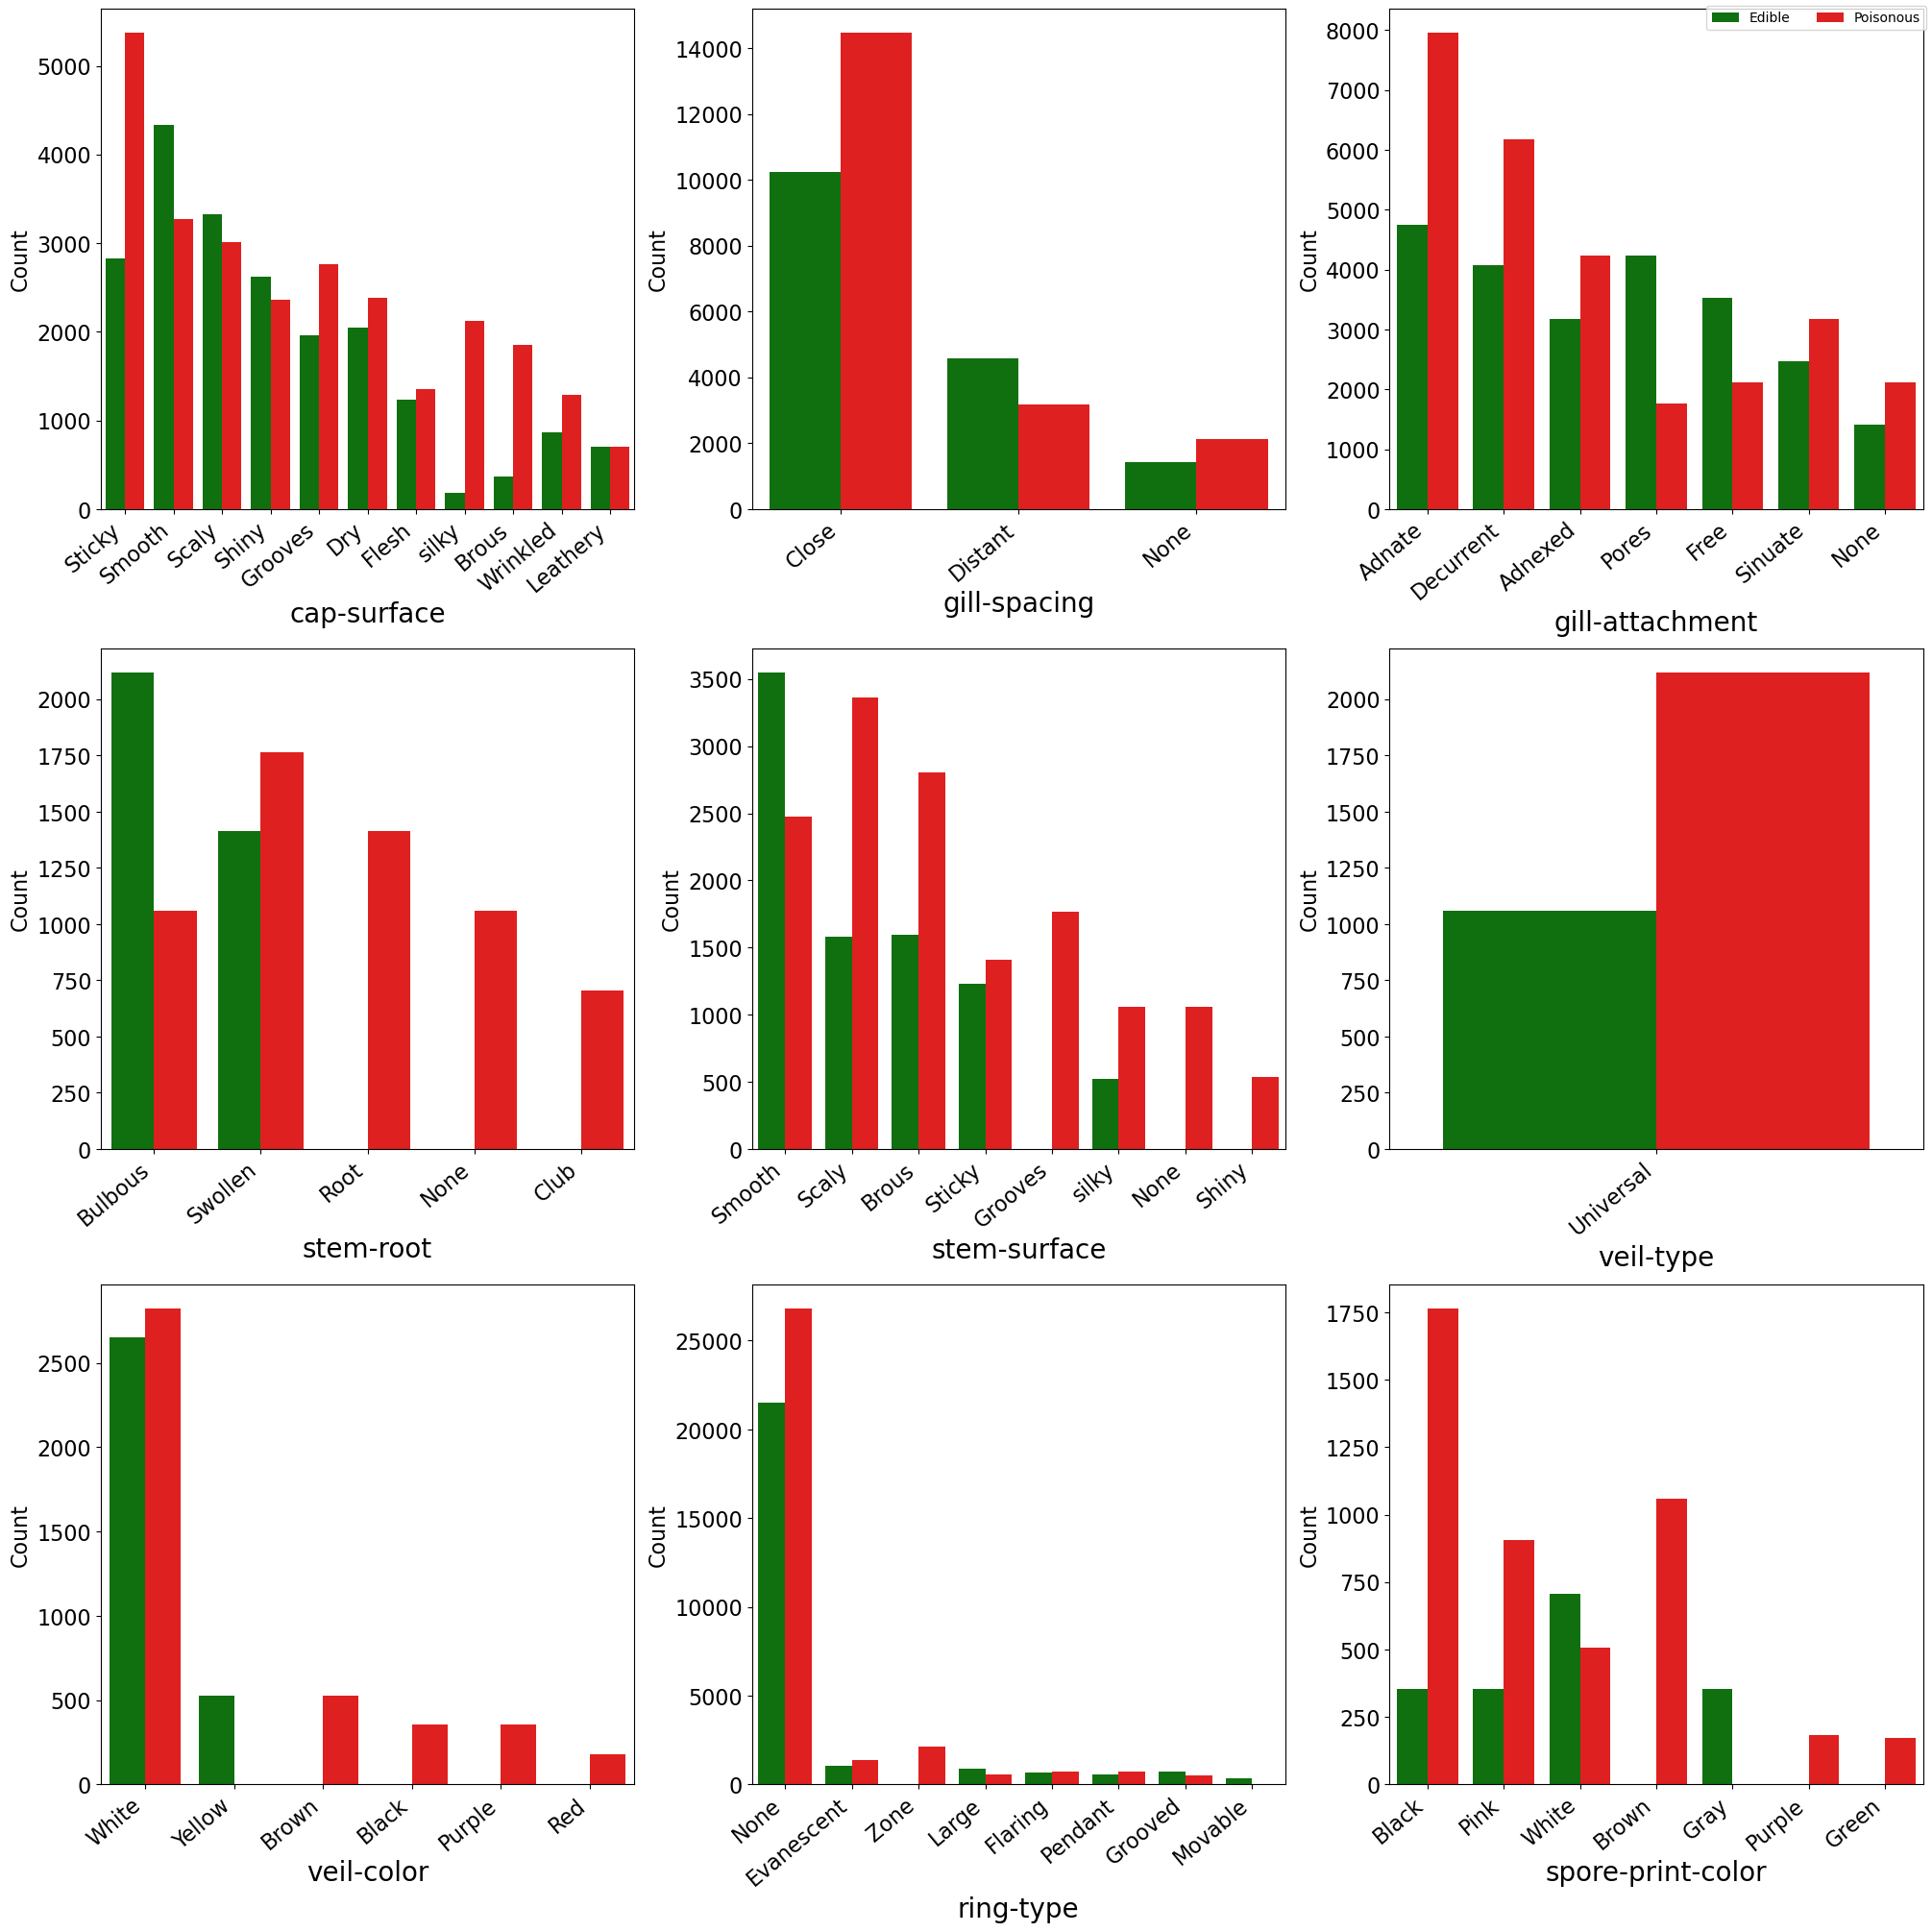

In [7]:
#Some columns feature large amounts of its rows as missing data.
#They are 9 categorical variables that have NULL values:
#cap-surface,gill-spacing,gill-attachment,stem-root,stem-surface,veil-type,veil-color,ring-type,spore-print-color

category_with_NULL=pd.DataFrame(mushroom_clean[['cap-surface', 'gill-spacing', 'gill-attachment', 'stem-root','stem-surface','veil-type','veil-color','ring-type','spore-print-color']])

# Define subplot layout
# Set the spacing between the subplots using constrain_layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), constrained_layout = True)

# Flatten the axes array
axes = axes.flatten()

handles = []
labels = []
# Loop through the categorical columns and plot each variable in a separate subplot
for i, column in enumerate(category_with_NULL.select_dtypes(include='category')):
    ax = sb.countplot(x=column, data=category_with_NULL, hue = mushroom_clean['class'], order=category_with_NULL[column].value_counts().index, ax=axes[i], palette = ['green', 'red'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=16)
    ax.get_legend().remove()
    ax.set_xlabel(column, fontsize=20)
    ax.set_ylabel('Count')
    ax.set_ylabel('Count', fontsize=16)
    ax.tick_params(axis='y', labelsize=16)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Get the handles and labels from the previous plot
handles, labels = ax.get_legend_handles_labels()

# Create a single legend for all subplots
fig.legend(handles, labels, loc='upper right', ncol=3)

# Show the plot
plt.show()


### Our thought process on how to deal with NaN values

It would not be practical to remove all rows with NaN values as over 50,000 of our 61,069 values would be removed.

Next, filling in the missing values with the mode of categorical variable would not be practical, as it could cause a bias in the data, and would possibly affect the classification of these mushrooms. Many of them could be classified as edible due to the filled in data, when they could be infact poisonous. (and Vice-versa) This would not be ideal.

Lastly, we decided to look at the different features first to have a brief idea on the correlation between these variables and edibility.


### Result:


By observation of the grouped Bar plots, we are removing

**Universal Veil Type**: As it only contains one categorical level, and does not help in our investigation at all

We will leave the rest of columns with NaN values as they are first, as we believe removing the whole column is impractical because it could makes us lose data that might be important in helping classify edibility. We will proceed to add an "Unknown" feature for those variables with NaN values.



In [8]:
#Remove veil type category from dataset.

mushroom_clean.drop(['veil-type'], axis=1,inplace=True)
print("Data dims : ", mushroom_clean.shape)

Data dims :  (61069, 20)


In [9]:
#Add "Unknown" feature for the remaining columns with NaN values
#So that we can proceed with DEA and MLA
   
        
#1. Function to impute null value with new category
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])
        
## Call function to create new category for variables
for column in mushroom_clean:
    if (np.NaN in mushroom_clean[column].unique()):
        impute_nan_create_category(mushroom_clean,column)

#Change object back into category
mushroom_clean.loc[:,mushroom_clean.dtypes == 'object'] = mushroom_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))


print(mushroom_clean.shape)
print(mushroom_clean.isnull().sum())
mushroom_clean.info()

    

(61069, 20)
class                   0
cap-diameter(cm)        0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height(cm)         0
stem-width(mm)          0
stem-root               0
stem-surface            0
stem-color              0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter(cm)      61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           61069 non-null  category
 4   cap-color             61069 n

# Data Exploration and Visualisation

## Exploring class

Poisonous    33888
Edible       27181
Name: class, dtype: int64

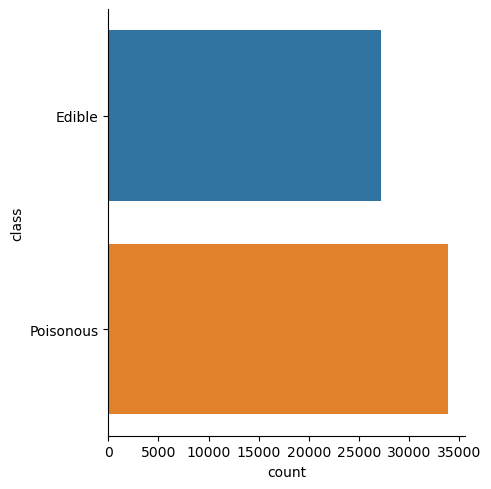

In [10]:
#Looking at the count of edible vs poisonous mushrooms in our data 
sb.catplot(y = "class", data = mushroom_clean, kind = "count")
mushroom_clean['class'].value_counts()

We can see that we have a roughly equal amount of edible vs poisonous mushrooms in our data , hence no need for resampling


## Exploring the 3 numerical data columns
Numerical variables:
1. cap-diameter
2. stem-height
3. stem-width

In [11]:
#Creating data set with only the 3 numerical variables

mushroom_num = mushroom_clean.loc[:,['cap-diameter(cm)','stem-height(cm)','stem-width(mm)']]
mushroom_num.describe()


cap-diameter(cm)  stem-height(cm)  stem-width(mm)
count      61069.000000     61069.000000    61069.000000
mean           6.733854         6.581538       12.149410
std            5.264845         3.370017       10.035955
min            0.380000         0.000000        0.000000
25%            3.480000         4.640000        5.210000
50%            5.860000         5.950000       10.190000
75%            8.540000         7.740000       16.570000
max           62.340000        33.920000      103.910000

<AxesSubplot:xlabel='stem-width(mm)'>

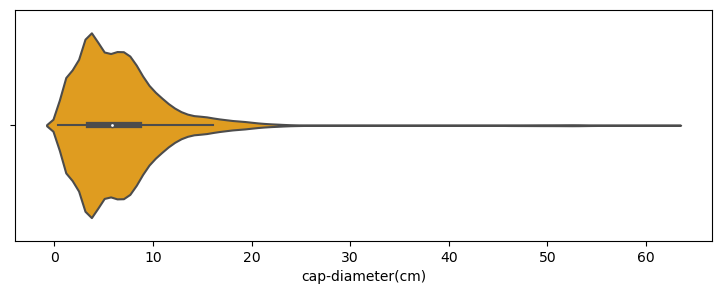

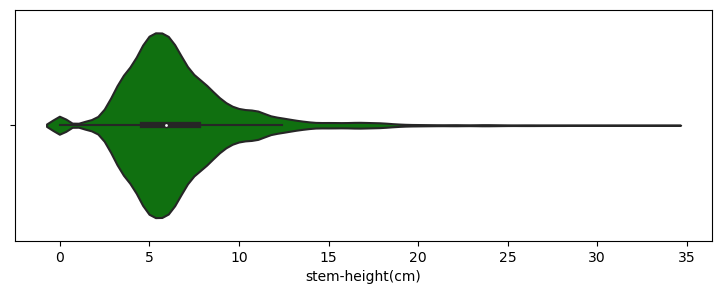

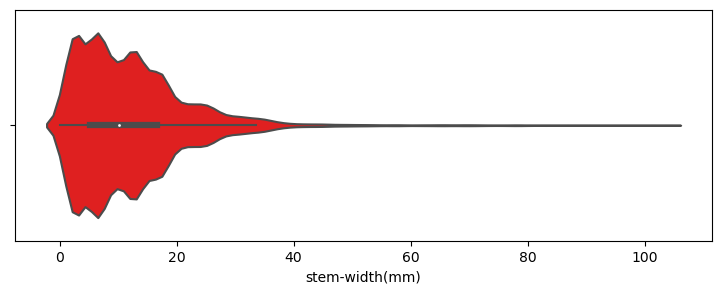

In [12]:
f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_num,x = 'cap-diameter(cm)',color='orange')
#sb.stripplot(data=mushroom_clean,x='cap-diameter', color='grey',alpha=0.1)

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_num,x='stem-height(cm)',color='green')

f = plt.figure(figsize=(9, 3))
sb.violinplot(data=mushroom_num,x='stem-width(mm)',color='red')


### Findings:

We can see that across all 3 numerical columns, the data of these 3 dimensions of the mushrooms are mostly close together with relatively low standard deviation, with a few data points that are significantly longer/larger across the 3 numerical columns.

                  cap-diameter(cm)  stem-height(cm)  stem-width(mm)
cap-diameter(cm)           1.00000         0.422560        0.695330
stem-height(cm)            0.42256         1.000000        0.436117
stem-width(mm)             0.69533         0.436117        1.000000


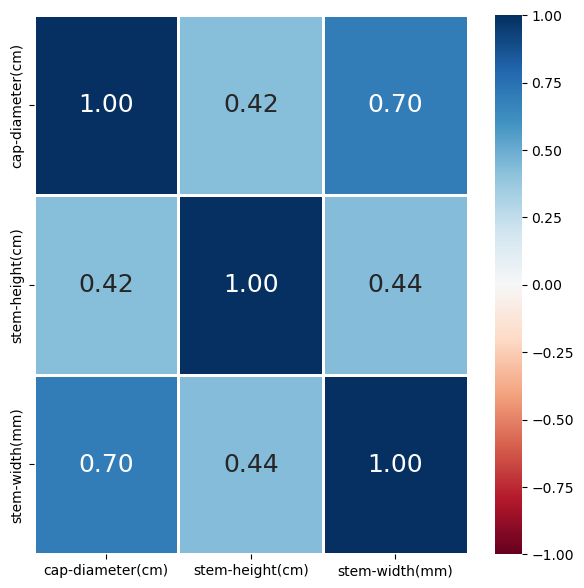

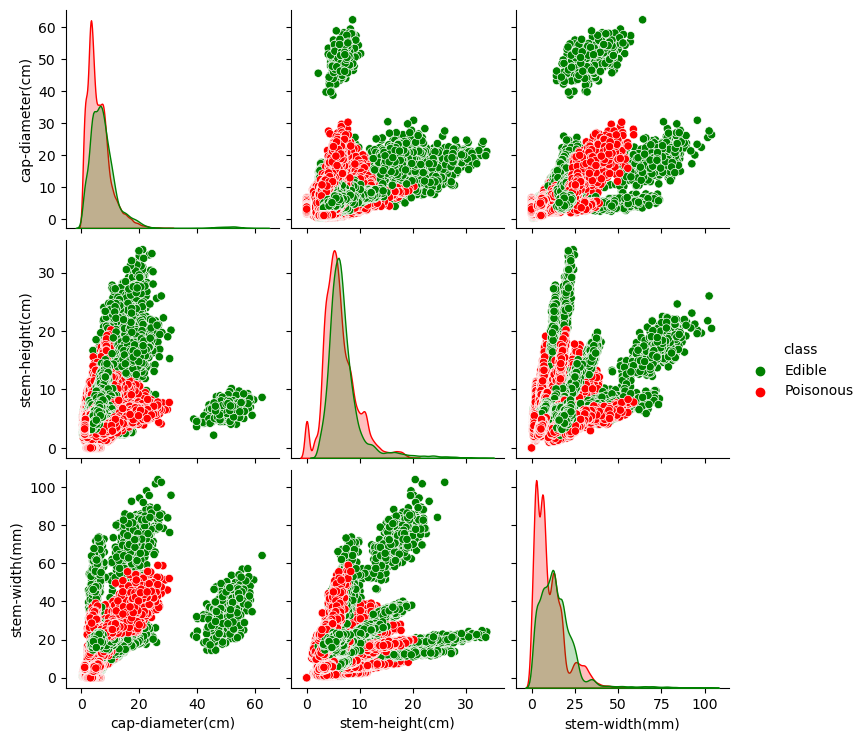

In [13]:
# Correlation Matrix for numeric variables
print(mushroom_num.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(7, 7))
sb.heatmap(mushroom_num.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

mushroom_num['class'] = mushroom_clean['class'] 

# Draw pairs of variables against one another
sb.pairplot(data = mushroom_num, hue = 'class', palette = ['green', 'red'])


### Findings : 
It appears stem-width(mm) and cap-diameter(cm) have a fairly strong positive correlation of 0.70 while the correlation between

[stem-width(mm) and stem-height(mm)] and [cap-diameter(cm) and stem-height(mm)] have a medium strength positive correlation of 0.44 and 0.42 respectively.

## Comparing the 3 numerical variables against Class of mushroom

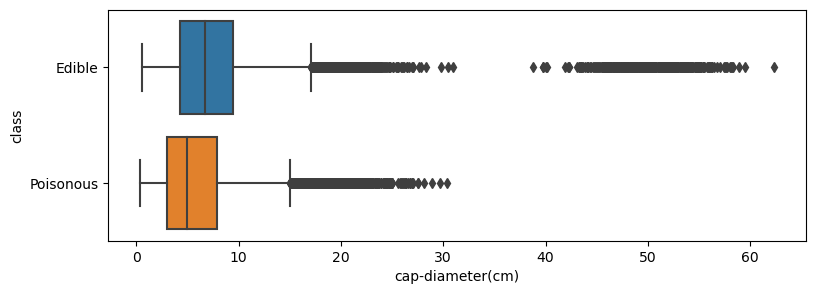

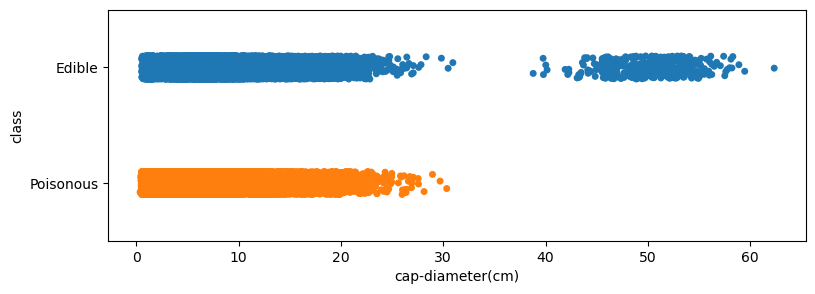

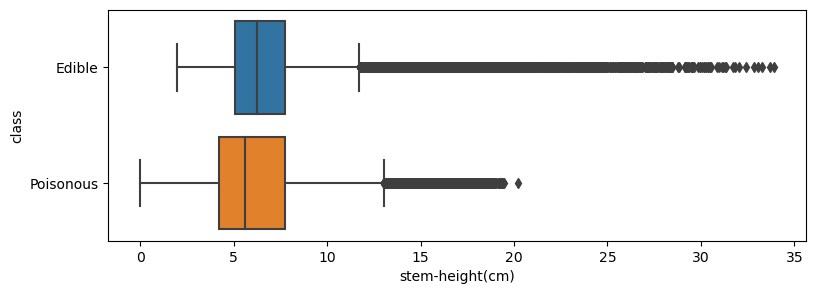

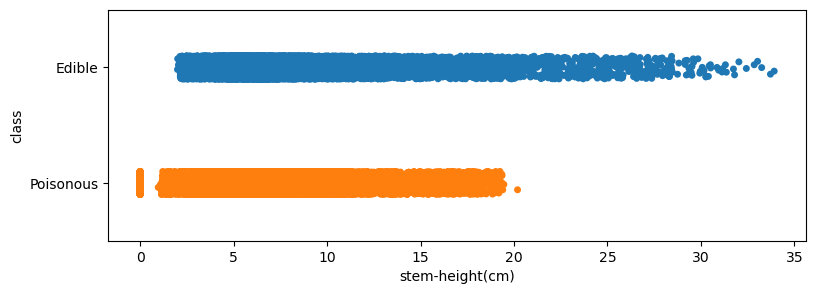

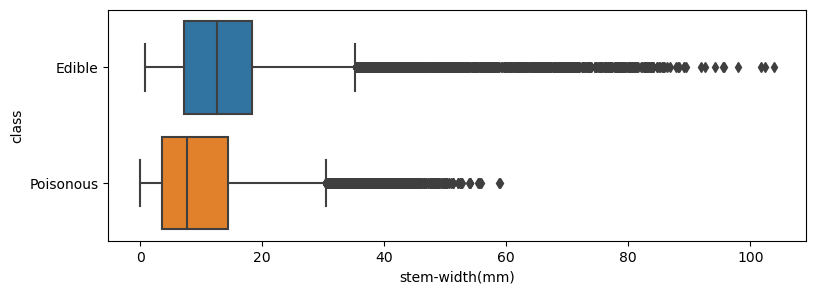

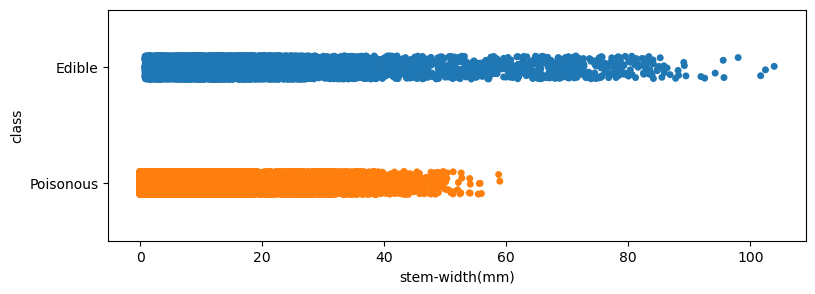

In [14]:
for column in mushroom_num:
    if (mushroom_num[column].dtypes == 'float64'):
        # Joint Boxplot of Numerical Variables against Class
        f = plt.figure(figsize=(9,3))
        sb.boxplot(x = column, y = "class", data = mushroom_num, orient = "h")
        # Joint Stripplot of Numerical Variables against Class
        f = plt.figure(figsize=(9, 3))
        sb.stripplot(x=column, y='class', data = mushroom_num)
        
#Swarmplot not possible as we have over 60,000 entries, even if we reduced it to 10%, it then would give an inaccurate representation of the data
#f = plt.figure(figsize=(9,3))
#sb.swarmplot(x = column, y = "class", data = mushroom_clean.sample(frac=0.1) , orient = "h")
        

### Findings: 

We can see that for 
1. **cap-diameter** : Any mushrooms from this dataset with cap-diameter longer than 31cm is guaranteed to be edible, 100% confidence.
2. **stem-height**  : Any mushrooms from this dataset with stem-height longer than 21cm is guaranteed to be edible, 100% confidence.
3. **stem-width**   :  Any mushrooms from this dataset with stem-width longer than 60mm is guaranteed to be edible, 100% confidence.

It appears that in this dataset, the bigger sized mushrooms are edible!


## Exploring the 16 categorical data columns (excludes class)
Categorical variables:

1. cap-shape
2. cap-surface
3. cap-color
4. does-bruise-or-bleed
5. gill-attachment
6. gill-spacing
7. gill-color
8. stem-root
9. stem-surface
10. stem-color
11. veil-color
12. has-ring
13. ring-type
14. spore-print-color
15. habitat
16. season

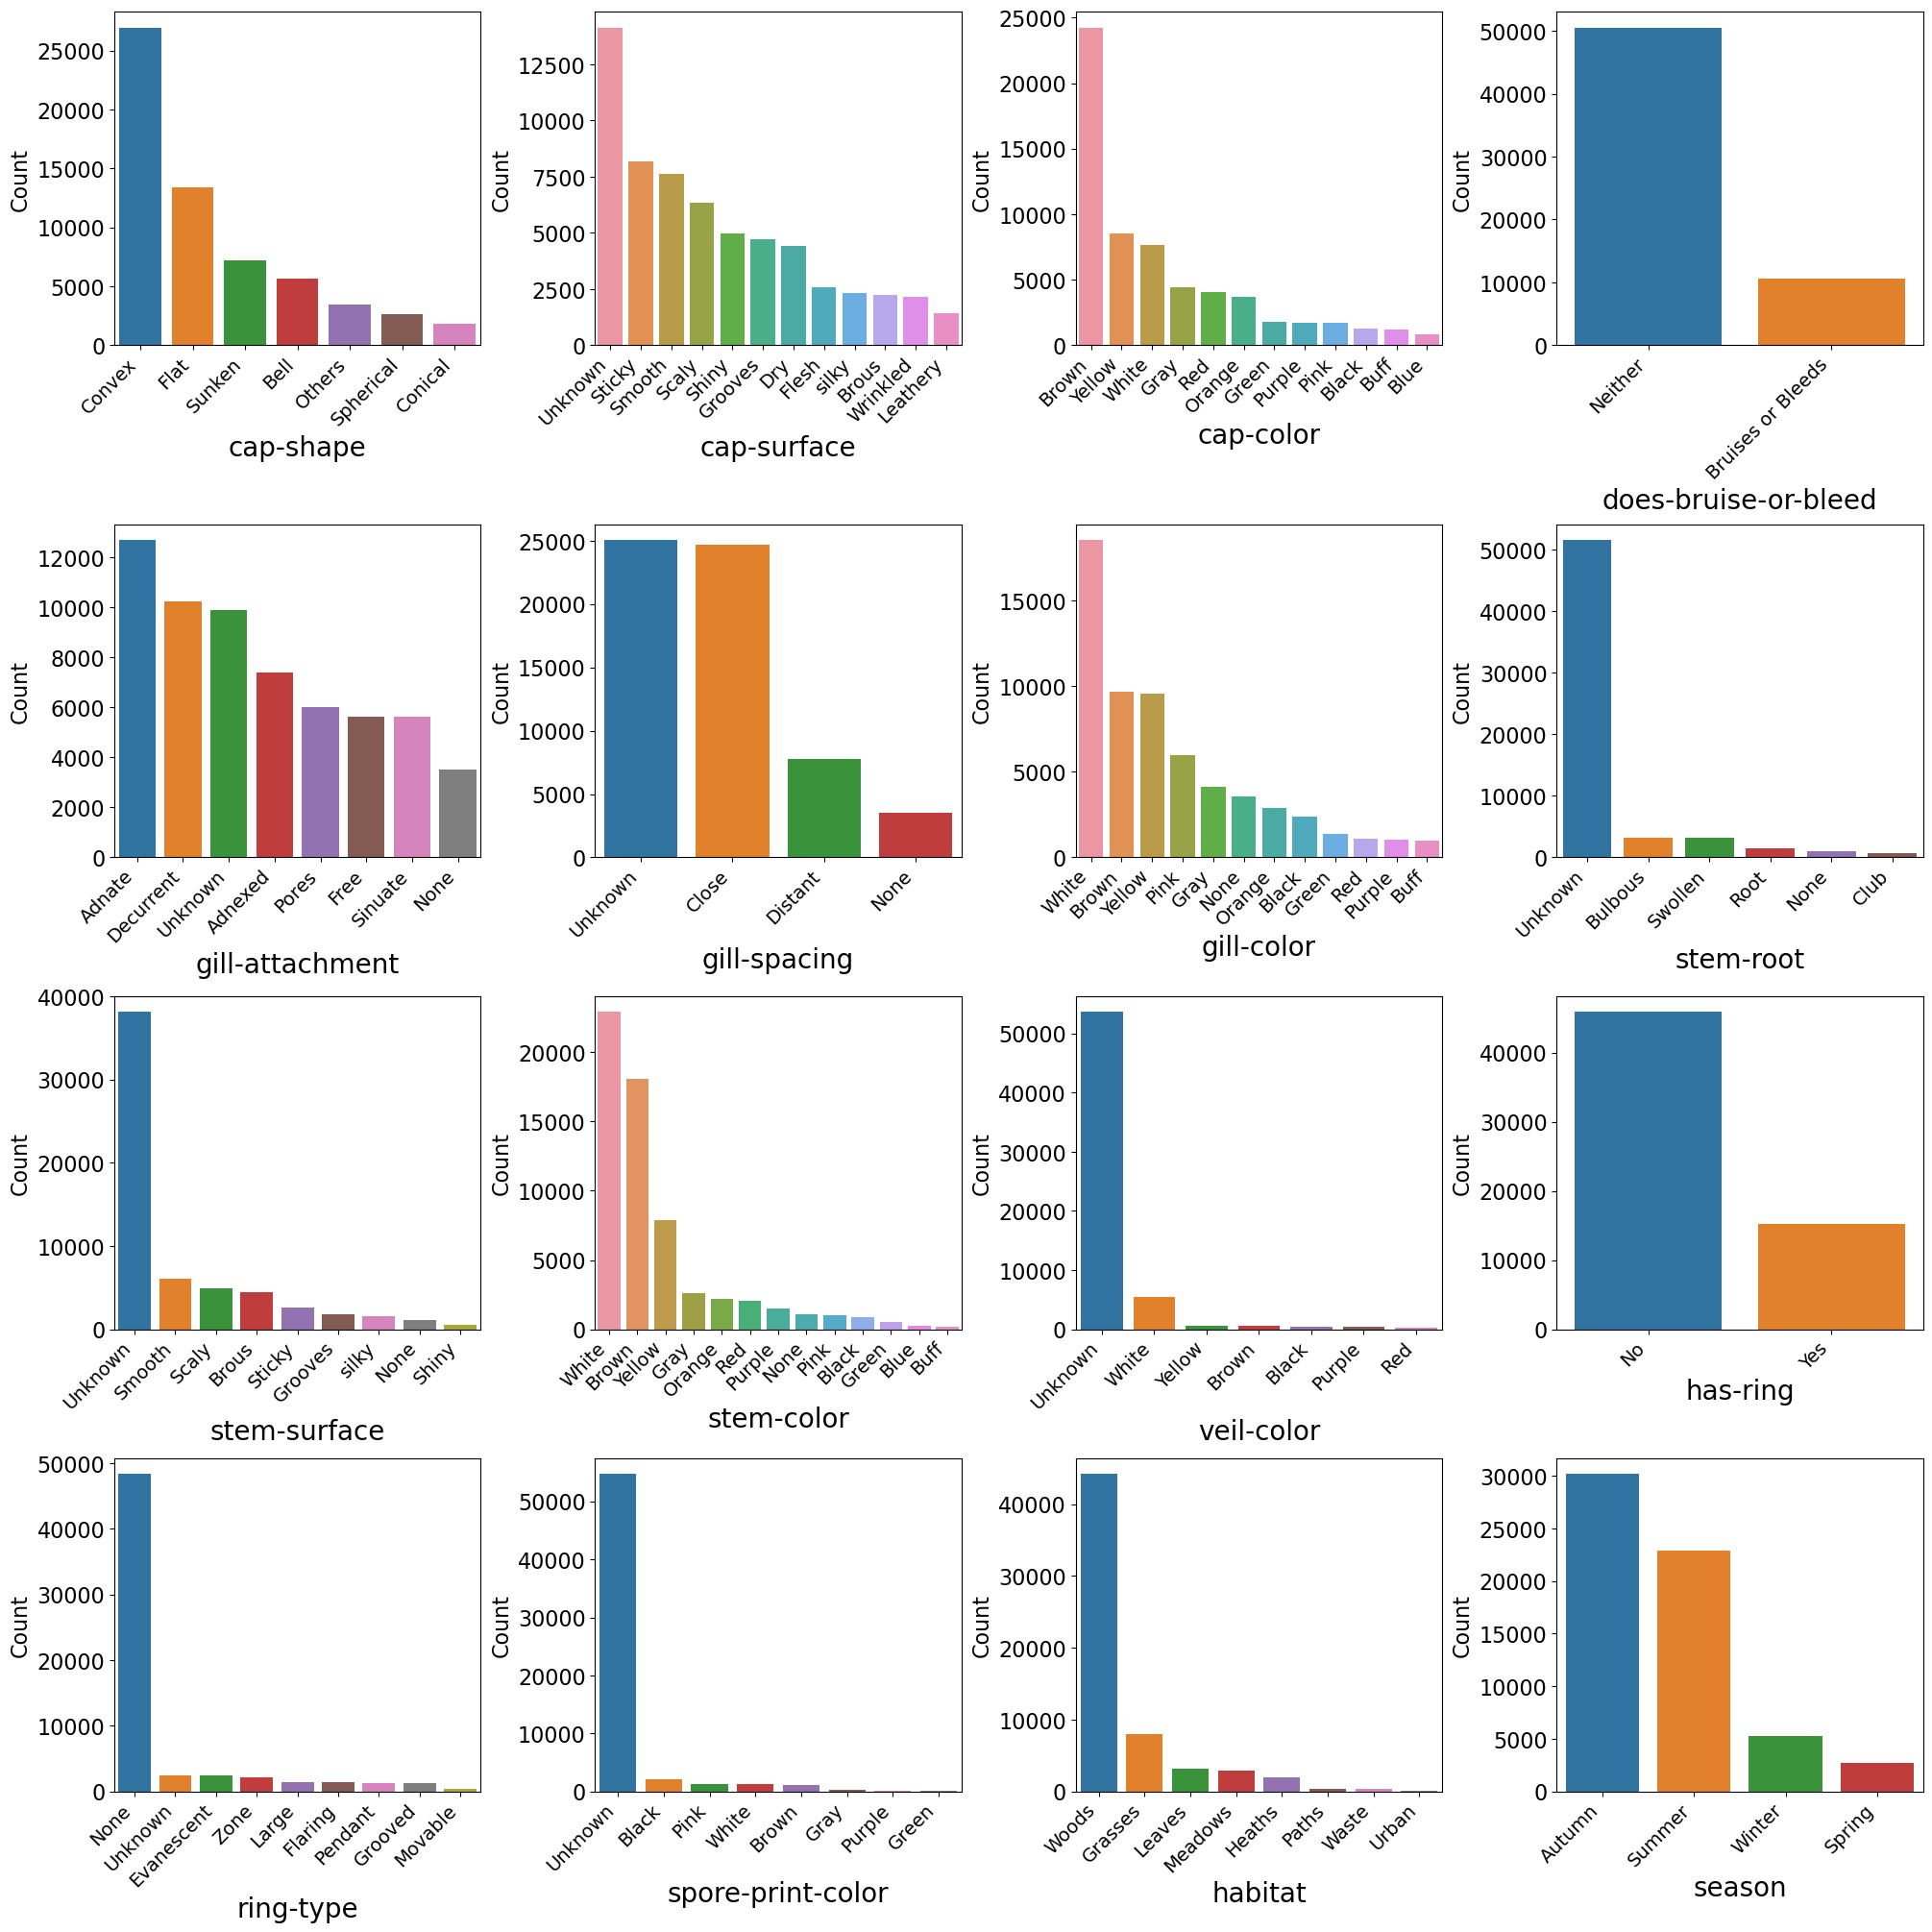

In [15]:
# Create dataset without class column
mushroom_wo_class = mushroom_clean.drop('class', axis=1)

# Define subplot layout
# Set the spacing between the subplots using constrain_layout
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), constrained_layout=True)

# Flatten the axes array
axes = axes.flatten()

# Loop through the categorical columns and plot each variable in a separate subplot
for i, column in enumerate(mushroom_wo_class.select_dtypes(include='category')):
    sb.countplot(x=column, data=mushroom_wo_class, order=mushroom_wo_class[column].value_counts().index, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right", fontsize=9)
    axes[i].set_xlabel(column, fontsize=20)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].tick_params(axis='y', labelsize=16)  # set fontsize of y-axis ticks
    axes[i].tick_params(axis='x', labelsize=14)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Show the plot
plt.show()



### Findings: 

Most of the categorical variables contain many features.

We also see that most of the categorical columns are unbalanced between their features, some features are common and some are very rare.

These can be seen from the colours of the different features, where colours like Brown,Yellow,White are much more common than colours such as Orange, Red, Purple, Pink, Black, Green, Blue, Gray.

Other observed unbalances include: 
1. most of the mushrooms in this dataset do not Bruise or Bleed 
2. most mushrooms are from the habitat "Woods"
3. most mushrooms have no ring-type

## Comparing the 16 Categorical variables against Class of mushroom


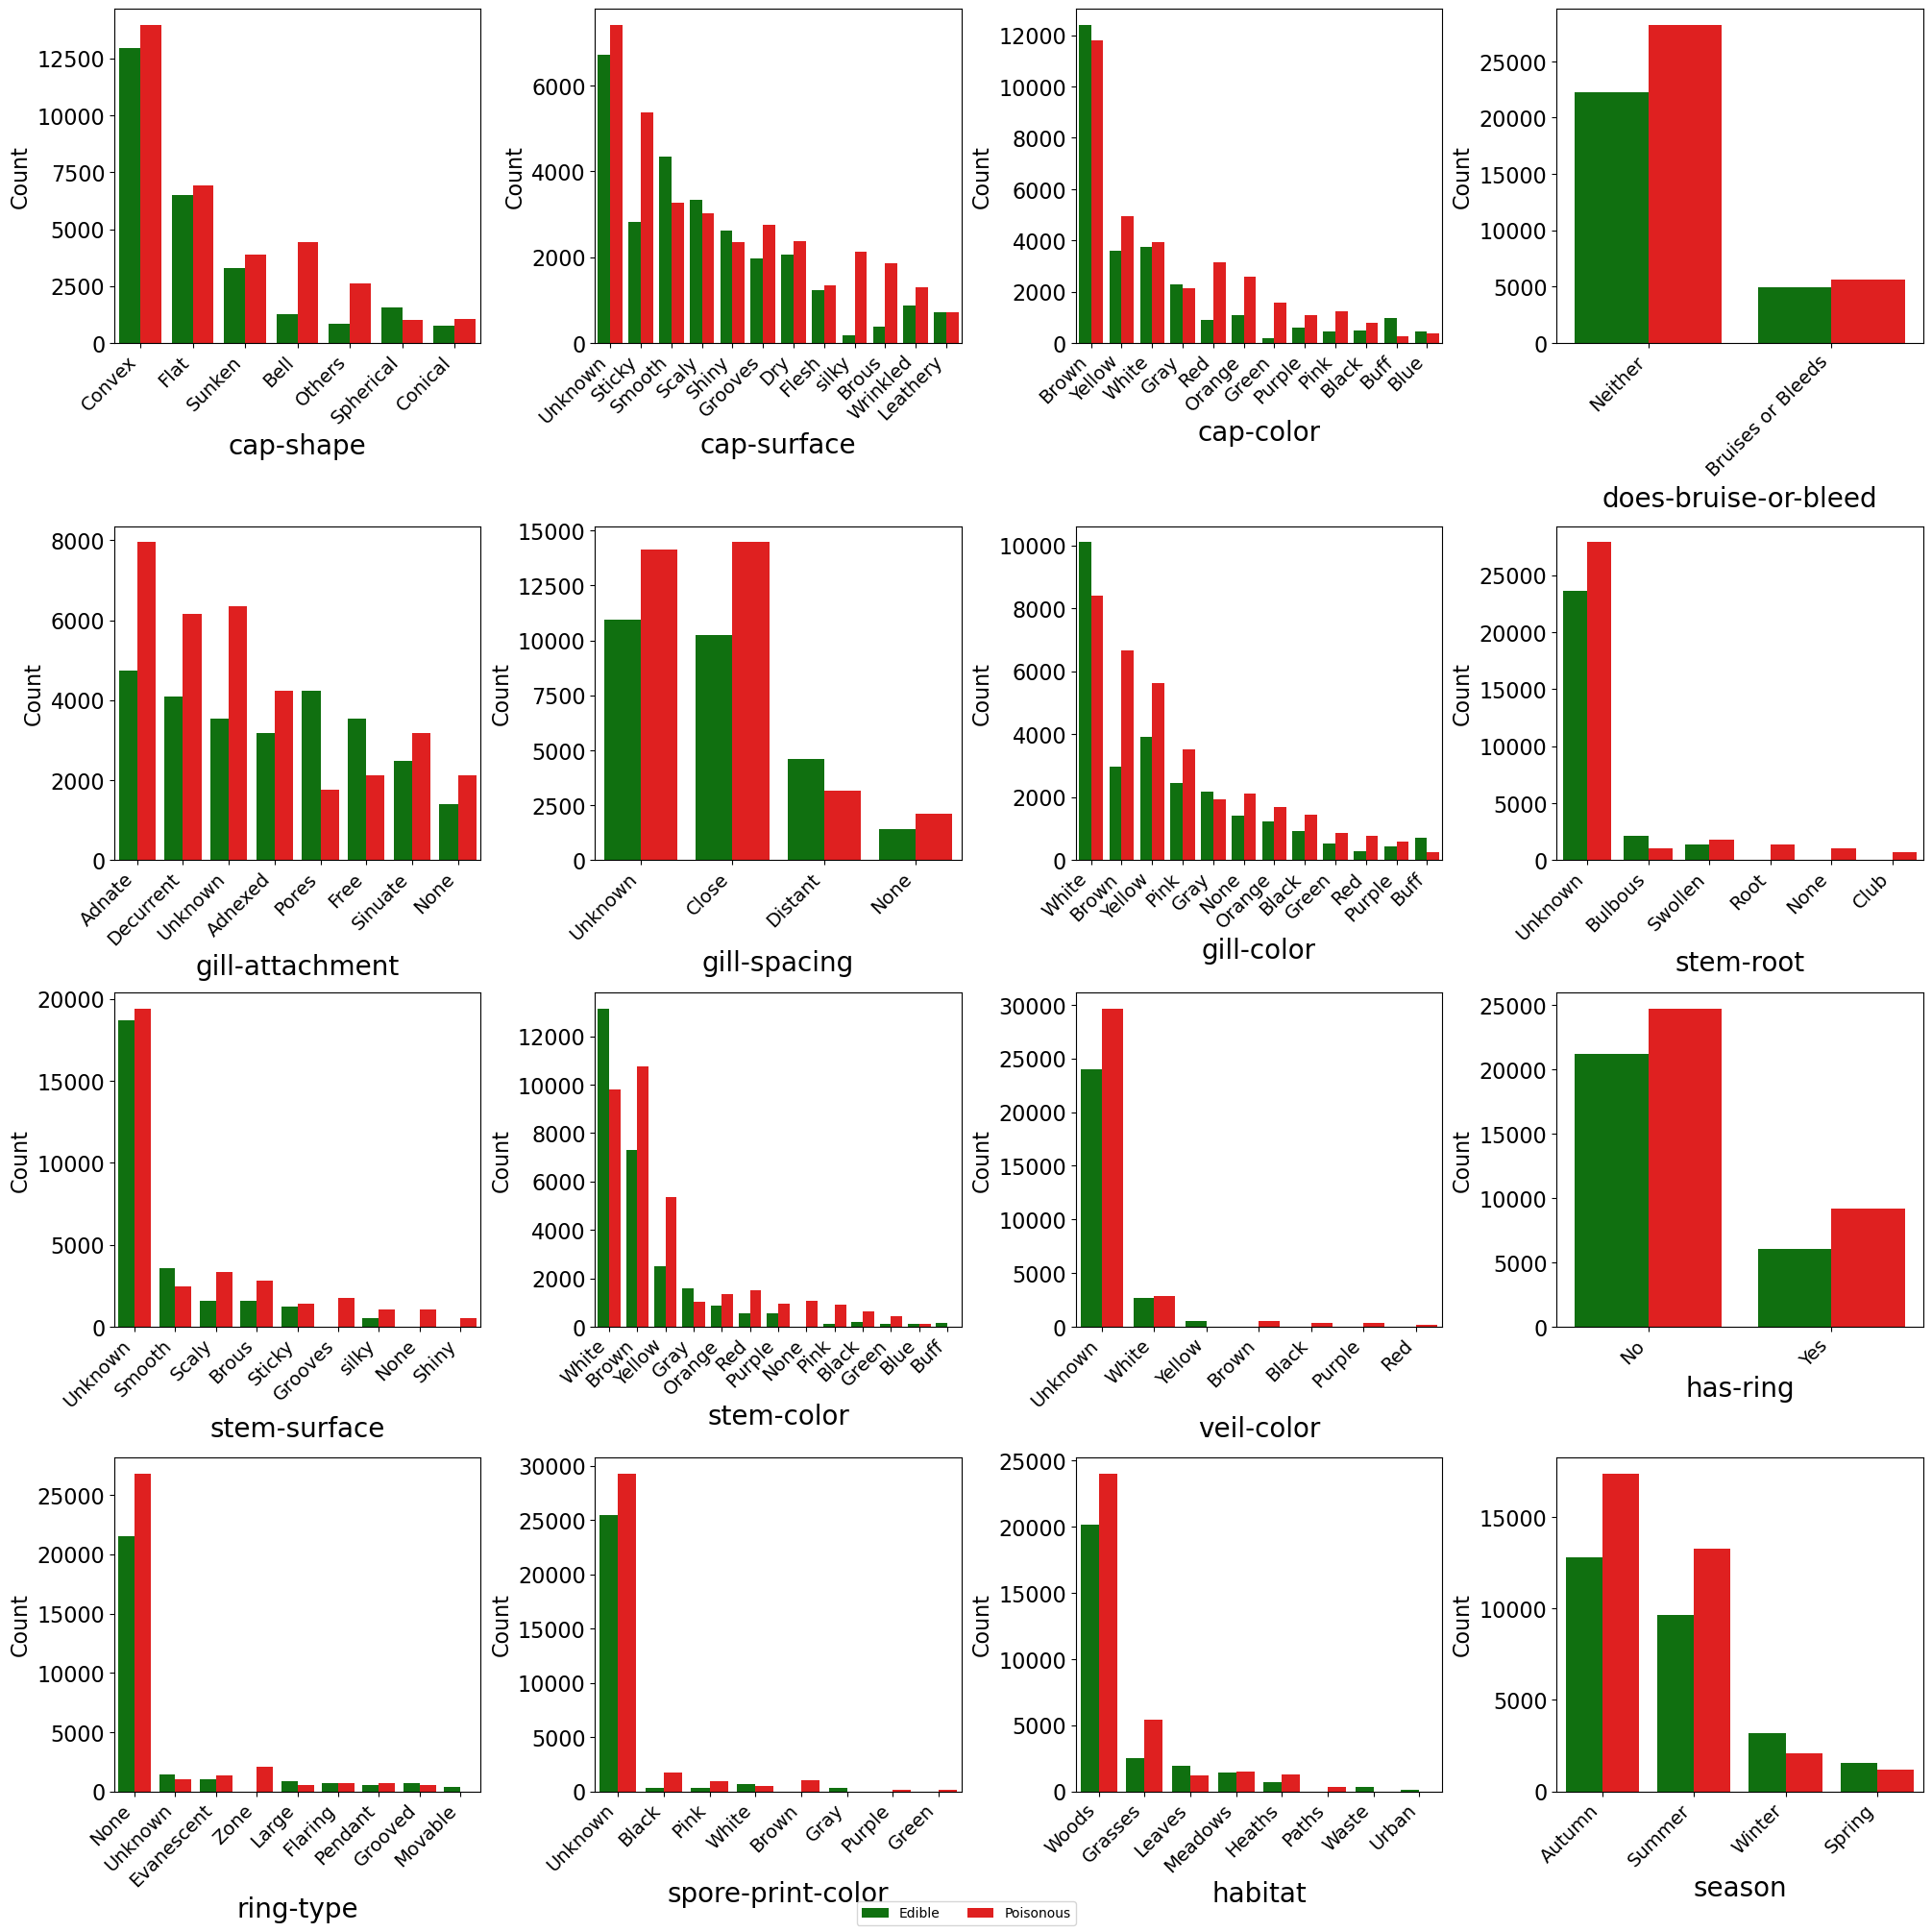

In [16]:
# Define subplot layout
# Set the spacing between the subplots using constrain_layout
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), constrained_layout = True)

# Flatten the axes array
axes = axes.flatten()

handles = []
labels = []
# Loop through the categorical columns and plot each variable in a separate subplot
for i, column in enumerate(mushroom_wo_class.select_dtypes(include='category')):
    ax = sb.countplot(x=column, data=mushroom_wo_class, hue = mushroom_clean['class'], order=mushroom_wo_class[column].value_counts().index, ax=axes[i], palette = ['green', 'red'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel(column, fontsize=20)
    ax.set_ylabel('Count')
    ax.set_ylabel('Count', fontsize=16)
    ax.tick_params(axis='y', labelsize=16)
    
# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Get the handles and labels from the previous plot
handles, labels = ax.get_legend_handles_labels()

# Create a single legend for all subplots
fig.legend(handles, labels, loc='lower center', ncol=3)

# Show the plot
plt.show()


### Findings: 
Across most of the categorical variables, the mushrooms with rare features are more likely to be poisonous

Whereas mushrooms with common features tend to have a roughly equal probability of being edible or poisonous.

In [17]:
#Create new data set with only the categorical columns

mushroom_cat = mushroom_clean.copy()

for column in mushroom_cat: 
    if (mushroom_cat[column].dtypes == 'float64'):
        mushroom_cat.drop(column, axis=1,inplace=True)
        
mushroom_cat

class cap-shape cap-surface cap-color does-bruise-or-bleed  \
0      Poisonous    Convex     Grooves    Orange              Neither   
1      Poisonous    Convex     Grooves    Orange              Neither   
2      Poisonous    Convex     Grooves    Orange              Neither   
3      Poisonous      Flat       Shiny       Red              Neither   
4      Poisonous    Convex       Shiny    Orange              Neither   
...          ...       ...         ...       ...                  ...   
61064  Poisonous    Sunken      Smooth    Yellow              Neither   
61065  Poisonous      Flat      Smooth    Yellow              Neither   
61066  Poisonous    Sunken      Smooth    Yellow              Neither   
61067  Poisonous      Flat      Smooth    Yellow              Neither   
61068  Poisonous    Sunken      Smooth    Yellow              Neither   

      gill-attachment gill-spacing gill-color stem-root stem-surface  \
0                Free      Unknown      White   Swollen        Scaly   
1                Free      Unknown      White   Swollen        Scaly   
2                Free      Unknown      White   Swollen        Scaly   
3                Free      Unknown      White   Swollen        Scaly   
4                Free      Unknown      White   Swollen        Scaly   
...               ...          ...        ...       ...          ...   
61064            None         None       None   Unknown      Unknown   
61065            None         None       None   Unknown      Unknown   
61066            None         None       None   Unknown      Unknown   
61067            None         None       None   Unknown      Unknown   
61068            None         None       None   Unknown      Unknown   

      stem-color veil-color has-ring ring-type spore-print-color habitat  \
0          White      White      Yes   Grooved           Unknown   Woods   
1          White      White      Yes   Grooved           Unknown   Woods   
2          White      White      Yes   Grooved           Unknown   Woods   
3          White      White      Yes   Pendant           Unknown   Woods   
4          White      White      Yes   Pendant           Unknown   Woods   
...          ...        ...      ...       ...               ...     ...   
61064     Yellow    Unknown       No      None           Unknown   Woods   
61065     Yellow    Unknown       No      None           Unknown   Woods   
61066     Yellow    Unknown       No      None           Unknown   Woods   
61067     Yellow    Unknown       No      None           Unknown   Woods   
61068     Yellow    Unknown       No      None           Unknown   Woods   

       season  
0      Winter  
1      Summer  
2      Winter  
3      Winter  
4      Winter  
...       ...  
61064  Autumn  
61065  Autumn  
61066  Summer  
61067  Summer  
61068  Summer  

[61069 rows x 17 columns]

### Things to note:

Our categorical variables contain features which are nominal : where there is no apparent order in the features,
For example colours have no natural ordering, whereas ordinal categorical variables such as movie ratings : {'good','mediocore','bad'} have a natural ordering

Since we have nominal categorical variables, we use LabelEncoder to convert each unique nominal value in the column to a numerical value where the numbers do not inherently have any ordinal relationship, so our models may interpret the categorical variables appropriately as nominal values

In [18]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for feature in mushroom_cat.columns :
    data_encoded[feature]=label.fit_transform(mushroom_cat[feature])


In [19]:
# Poisonous is encoded as 1 and Edible is encoded as 0
# Drop the class column to be encoded manually as we want Edible to be 1 and Poisonous to be 0
data_encoded_copy = data_encoded.copy()
data_encoded_wo_class = data_encoded_copy.drop('class', axis=1)

#Encoding Edible as 1 and poisonous as 0, because we are trying to find out if a mushroom is edible or not, so Edible will be 1.
mushroom_cat_class = mushroom_cat['class'].copy()
mushroom_cat_class = mushroom_cat_class.map({'Poisonous':0,'Edible':1})
result = pd.concat([mushroom_cat_class, data_encoded_wo_class], axis = 1)
result


class  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0         0          2            3          6                     1   
1         0          2            3          6                     1   
2         0          2            3          6                     1   
3         0          3            6          9                     1   
4         0          2            6          6                     1   
...     ...        ...          ...        ...                   ...   
61064     0          6            7         11                     1   
61065     0          3            7         11                     1   
61066     0          6            7         11                     1   
61067     0          3            7         11                     1   
61068     0          6            7         11                     1   

       gill-attachment  gill-spacing  gill-color  stem-root  stem-surface  \
0                    3             3          10          4             3   
1                    3             3          10          4             3   
2                    3             3          10          4             3   
3                    3             3          10          4             3   
4                    3             3          10          4             3   
...                ...           ...         ...        ...           ...   
61064                4             2           5          5             7   
61065                4             2           5          5             7   
61066                4             2           5          5             7   
61067                4             2           5          5             7   
61068                4             2           5          5             7   

       stem-color  veil-color  has-ring  ring-type  spore-print-color  \
0              11           5         1          2                  6   
1              11           5         1          2                  6   
2              11           5         1          2                  6   
3              11           5         1          6                  6   
4              11           5         1          6                  6   
...           ...         ...       ...        ...                ...   
61064          12           4         0          5                  6   
61065          12           4         0          5                  6   
61066          12           4         0          5                  6   
61067          12           4         0          5                  6   
61068          12           4         0          5                  6   

       habitat  season  
0            7       3  
1            7       2  
2            7       3  
3            7       3  
4            7       3  
...        ...     ...  
61064        7       0  
61065        7       0  
61066        7       2  
61067        7       2  
61068        7       2  

[61069 rows x 17 columns]

## Cramer's V 
#### to understand r/s between nominal categorical predictors and binary 'class'

To better understand the r/s between the categorical variables and our response 'class', we will be using Cramer's V approach. 

Cramer's V is a measure of association between two nominal variables, similar to the correlation coefficient for continuous variables. It ranges from 0 to 1, where 0 indicates no association and 1 indicates a strong association.

Cramer's V uses the chi2 test

How it works: The chi2 test compares the observed frequencies of each category of one variable to the expected frequencies of each category, assuming that there is no association between the two variables. If the observed frequencies differ significantly from the expected frequencies, then it suggests that there is a significant association between the two variables.

What it actually calculates:  The test involves calculating a test statistic, which measures the difference between the observed and expected frequencies, and then comparing this value to a critical value from the chi-square distribution. If the test statistic is greater than the critical value, then we can conclude that there is a significant association between the two variables.

In [20]:
# Building of Cramer's V function


from scipy.stats import chi2_contingency
import numpy as np


def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))
        
    
#Building of the matrix
rows= []

#Nested for loop to compare each variable to every other variable
for var1 in result:
    col = []
    for var2 in result:
        cramers = cramers_V(result[var1], result[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
cramerVdf = pd.DataFrame(cramers_results, columns = result.columns, index = result.columns)

cramerVdf

class  cap-shape  cap-surface  cap-color  \
class                  1.00       0.04         0.05       0.06   
cap-shape              0.04       1.00         0.05       0.02   
cap-surface            0.05       0.05         1.00       0.03   
cap-color              0.06       0.02         0.03       1.00   
does-bruise-or-bleed   0.00       0.11         0.06       0.03   
gill-attachment        0.05       0.14         0.08       0.04   
gill-spacing           0.01       0.14         0.09       0.04   
gill-color             0.04       0.10         0.05       0.07   
stem-root              0.05       0.08         0.05       0.02   
stem-surface           0.07       0.10         0.07       0.03   
stem-color             0.07       0.07         0.04       0.10   
veil-color             0.03       0.01         0.05       0.02   
has-ring               0.00       0.05         0.11       0.03   
ring-type              0.04       0.04         0.05       0.02   
spore-print-color      0.04       0.02         0.07       0.04   
habitat                0.03       0.03         0.03       0.03   
season                 0.01       0.02         0.01       0.01   

                      does-bruise-or-bleed  gill-attachment  gill-spacing  \
class                                 0.00             0.05          0.01   
cap-shape                             0.11             0.14          0.14   
cap-surface                           0.06             0.08          0.09   
cap-color                             0.03             0.04          0.04   
does-bruise-or-bleed                  1.00             0.19          0.03   
gill-attachment                       0.19             1.00          0.41   
gill-spacing                          0.03             0.41          1.00   
gill-color                            0.05             0.20          0.35   
stem-root                             0.02             0.07          0.06   
stem-surface                          0.07             0.09          0.14   
stem-color                            0.04             0.07          0.07   
veil-color                            0.03             0.05          0.02   
has-ring                              0.00             0.18          0.02   
ring-type                             0.04             0.07          0.03   
spore-print-color                     0.02             0.04          0.06   
habitat                               0.02             0.03          0.03   
season                                0.02             0.02          0.02   

                      gill-color  stem-root  stem-surface  stem-color  \
class                       0.04       0.05          0.07        0.07   
cap-shape                   0.10       0.08          0.10        0.07   
cap-surface                 0.05       0.05          0.07        0.04   
cap-color                   0.07       0.02          0.03        0.10   
does-bruise-or-bleed        0.05       0.02          0.07        0.04   
gill-attachment             0.20       0.07          0.09        0.07   
gill-spacing                0.35       0.06          0.14        0.07   
gill-color                  1.00       0.06          0.07        0.09   
stem-root                   0.06       1.00          0.23        0.22   
stem-surface                0.07       0.23          1.00        0.18   
stem-color                  0.09       0.22          0.18        1.00   
veil-color                  0.04       0.05          0.02        0.02   
has-ring                    0.05       0.03          0.07        0.05   
ring-type                   0.03       0.07          0.03        0.02   
spore-print-color           0.08       0.05          0.03        0.05   
habitat                     0.02       0.01          0.03        0.02   
season                      0.02       0.01          0.01        0.02   

                      veil-color  has-ring  ring-type  spore-print-color  \
class                       0.03      0.00       0.04  

C:\Users\pc\AppData\Local\Temp\ipykernel_16252\1654025524.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cramerVdf, dtype=np.bool)


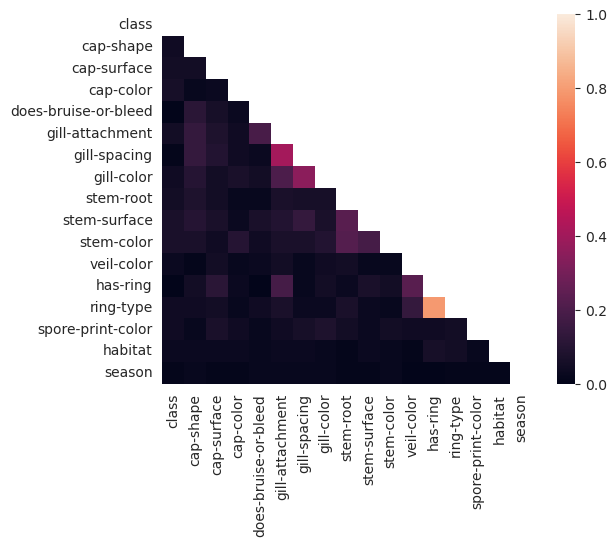

In [21]:
#Heatmap of Cramer's V correlation matrix

mask = np.zeros_like(cramerVdf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sb.axes_style("white"):
  ax = sb.heatmap(cramerVdf, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

### Findings :

From the first column of the Cramer's V matrix, we see that the variables with a relatively stronger relationship with class are:

1. stem-color(0.07)
2. stem-surface(0.07)
3. cap-color(0.06)
4. cap-surface(0.05)
5. gill-attachment(0.05)
6. stem-root(0.05) 

However, the overall relationship between the categorical predictors and class is not very strong, as all the Cramer's V values are less than 0.1.
As typically, a Cramer's V value above 0.1 is considered a moderate association or relationship between the variables while values above 0.3 are considered to indicate a strong association or relationship. 

However, it is important to note that when combined with other variables in a model, the variables may still produce a significant relationship  in predicting class.

## Correlation Matrix

We will also look at the correlation matrix of just the label encoded categorical values and not the chi2.

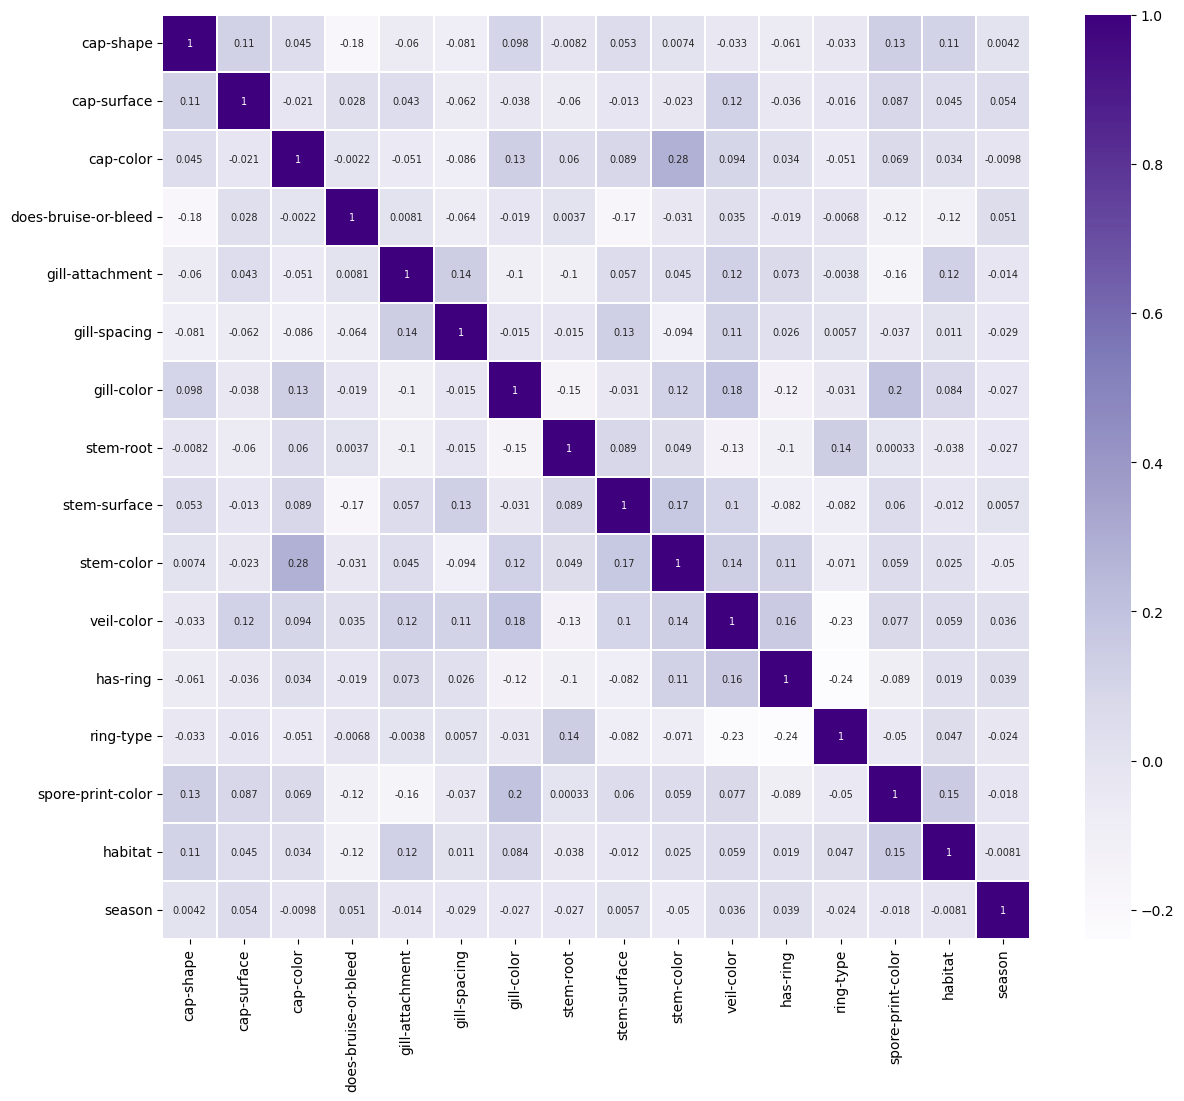

In [22]:
plt.figure(figsize=(14,12))
sb.heatmap(result.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

### Findings : 

The relatively higher correlated variables picked up from the ***Correlation Matrix***:
1. cap-surface (0.11)
2. does-bruise-or-bleed(-0.18)
3. gill-spacing (-0.81)
4. gill-color (0.098)
5. spore-print-color (0.13)
6. habitat(0.11)

We realise that the features picked out are very different from that of Cramer's V. We will revisit this when trying to optimise our model.

# Machine Learning Models

In [23]:
#Creating the predictor data frame which includes :  Numerical Predictors and Label encoded Categorical Predictors
mushroom_predictors = mushroom_clean.copy()
mushroom_predictors.drop(['class'], axis=1,inplace=True)

for feature in mushroom_predictors.columns :
    if (mushroom_predictors[feature].dtypes == 'category'):
        mushroom_predictors[feature]=label.fit_transform(mushroom_predictors[feature])

mushroom_predictors


cap-diameter(cm)  cap-shape  cap-surface  cap-color  \
0                 15.26          2            3          6   
1                 16.60          2            3          6   
2                 14.07          2            3          6   
3                 14.17          3            6          9   
4                 14.64          2            6          6   
...                 ...        ...          ...        ...   
61064              1.18          6            7         11   
61065              1.27          3            7         11   
61066              1.27          6            7         11   
61067              1.24          3            7         11   
61068              1.17          6            7         11   

       does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                         1                3             3          10   
1                         1                3             3          10   
2                         1                3             3          10   
3                         1                3             3          10   
4                         1                3             3          10   
...                     ...              ...           ...         ...   
61064                     1                4             2           5   
61065                     1                4             2           5   
61066                     1                4             2           5   
61067                     1                4             2           5   
61068                     1                4             2           5   

       stem-height(cm)  stem-width(mm)  stem-root  stem-surface  stem-color  \
0                16.95           17.09          4             3          11   
1                17.99           18.19          4             3          11   
2                17.80           17.74          4             3          11   
3                15.77           15.98          4             3          11   
4                16.53           17.20          4             3          11   
...                ...             ...        ...           ...         ...   
61064             3.93            6.22          5             7          12   
61065             3.18            5.43          5             7          12   
61066             3.86            6.37          5             7          12   
61067             3.56            5.44          5             7          12   
61068             3.25            5.45          5             7          12   

       veil-color  has-ring  ring-type  spore-print-color  habitat  season  
0               5         1          2                  6        7       3  
1               5         1          2                  6        7       2  
2               5         1          2                  6        7       3  
3               5         1          6                  6        7       3  
4               5         1          6                  6        7       3  
...           ...       ...        ...                ...      ...     ...  
61064           4         0          5                  6        7       0  
61065           4         0          5                  6        7       0  
61066           4         0          5                  6        7       2  
61067           4         0          5                  6        7       2  
61068           4         0          5                  6        7       2  

[61069 rows x 19 columns]

## Model 1 : Naïve Bayes Classifier 

***Response Variable*** : class

***Predictor Variable*** : Numerical variables + all the label encoded categorical variables

After doing Exploratory Data Analysis on both our numerical and categorical data, we found that our categorical values had little to no correlation with each other or with the “Class” variable. As such, we thought that it would be suitable to use the Naïve Bayes machine learning model to predict the edibility of mushrooms.

The Naïve Bayes algorithm is suitable as it makes the assumption that all variables in the dataset are "naive", or in other words, not correlated to each other or independent of any other values. The Naïve Bayes classifier tends to perform well on datasets where the features are approximately independent or have low levels of correlation.

This model will thus allow us to predict the class of mushroom edibility using our dataset which has low correlation values.

In [24]:
# Extract the variables and the associated data as a dataframe

predictor = mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)


Train Set : (48855,) (48855, 19)
Test Set  : (12214,) (12214, 19)


### Fitting the model

In [25]:
# Here we use Gaussian Naïve Bayes, which implements the Gaussian Naïve Bayes algorithm for classification.
# We import the GaussianNB package from the sklearn.naive_bayes module

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# We fit the model with the defined Train data
nb.fit(predictor_train, edible_train.values.ravel())


GaussianNB()

### The Train Set

In [26]:
# Helper Function
# Compute the True Positive Rate (TPR) and False Positive Rate (FPR)
def binary_metrics(y_actual, y_pred):
    CM = confusion_matrix(y_actual, y_pred)
    TP = CM[1][1] 
    TN = CM[0][0]
    FP = CM[0][1]
    FN = CM[1][0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return(TPR, FPR)


Accuracy:  0.6411626240916999
Naive Bayes Classification report for Train data (actual vs predicted): 

               precision    recall  f1-score   support

           0       0.72      0.58      0.64     27164
           1       0.58      0.72      0.64     21691

    accuracy                           0.64     48855
   macro avg       0.65      0.65      0.64     48855
weighted avg       0.66      0.64      0.64     48855



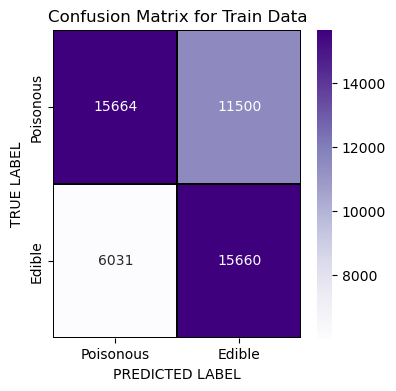

True Positive Rate :  0.7219584159328754
False Positive Rate :  0.4233544396996024


In [27]:
 # First make predictions on the train set
edible_train_pred = nb.predict(predictor_train)

# Evaluate the model by checking the accuracy of the predicted train data against the actual train data
accuracy = accuracy_score(edible_train, edible_train_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naïve Bayes Classification report for Train data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1train = confusion_matrix(edible_train, edible_train_pred)

x_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1
y_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

### Visualising probability distribution using ROC

In order to visualise the probability distribution of the model using an ROC AUC curve, we first compute the True Positive Rate (TPR) and False Positive Rate (FPR).

The TPR and FPR are calculated using the roc_curve function from the sklearn.metrics module.

The resulting ROC plot shows the relationship between sensitivity and specificity.

Sensitivity - The probability that the model predicts a positive outcome for an observation when the outcome is indeed positive.

Specificity - The probability that the model predicts a negative outcome for an observation when the outcome is indeed negative.

By visual observation, the closer the graph is to the top and left-hand borders, the more accurate it is.


AUC: 0.6805958


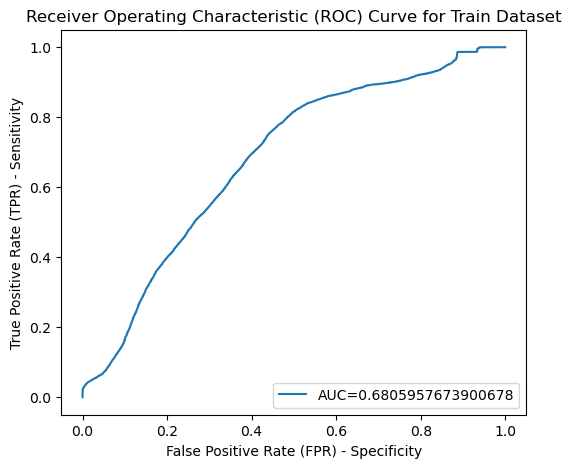

In [28]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict the probabilities of edible class for the train data
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_train)
edible_train_prob = predicted_prob[:, 1]
fpr, tpr, thresholds = roc_curve(edible_train, edible_train_prob, pos_label = 1)

# here we assign the predicted probabilities of the train set into y_true
y_true = (edible_train == 1).astype(int)
auc = roc_auc_score(y_true, edible_train_prob)
print("AUC: {:.7f}".format(auc))


fig = plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Dataset')
plt.show()


After obtaining the ROC Curve for the Train dataset, we can calculate the AUC (Area Under the Curve). The AUC is a measure of how well the model is able to discriminate between positive and negative instances.

AUC ranges from 0 to 1:

1 - Better discrimination performance

0 - Lower discrimination performance

An AUC of exactly 0.5 indicates that the model's ability to distinguish between edible and poisonous classes is no better than random chance. This means that the model's predictions are totally ineffective.


### The Test Set

Accuracy:  0.6412313738333061
Naive Bayes Classification report for Test data (actual vs predicted): 

               precision    recall  f1-score   support

           0       0.72      0.58      0.64     27164
           1       0.58      0.72      0.64     21691

    accuracy                           0.64     48855
   macro avg       0.65      0.65      0.64     48855
weighted avg       0.66      0.64      0.64     48855



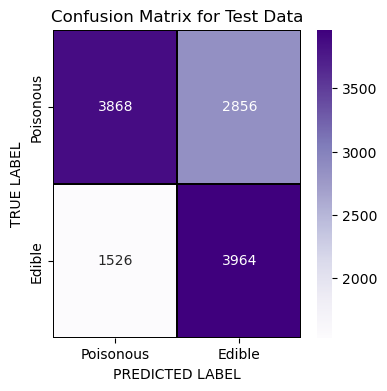

True Positive Rate :  0.722040072859745
False Positive Rate :  0.4247471743010113


In [29]:
# After making predictions on the train set, we make predictions on the test set
edible_test_pred = nb.predict(predictor_test)

# Evaluate the model again by checking the accuracy of the predicted test data against the actual test data
accuracy = accuracy_score(edible_test, edible_test_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naïve Bayes Classification report for Test data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1test = confusion_matrix(edible_test, edible_test_pred)

x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)


We now calculate the AUC for the Test Dataset.


AUC: 0.6842045


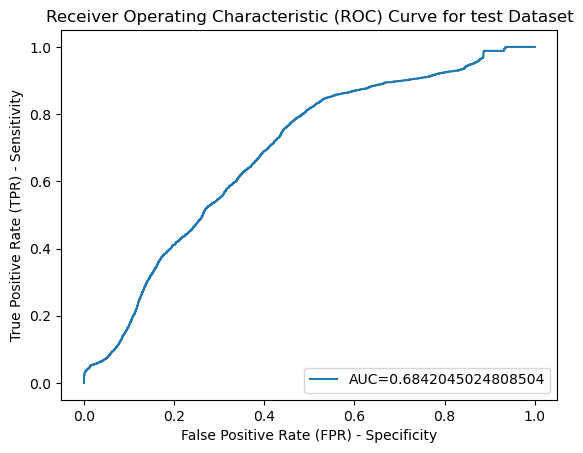

In [30]:
# Predict the probabilities of edible class for the test data
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_test)
edible_test_prob = predicted_prob[:, 1]
fpr, tpr, thresholds = roc_curve(edible_test, edible_test_prob, pos_label=1)

# Calculating the AUC of the Test dataset
y_true = (edible_test == 1).astype(int)
auc = roc_auc_score(y_true, edible_test_prob)
print("AUC: {:.7f}".format(auc))

# Create ROC curve
plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()




The resulting ROC curve above displays the trade-off between the TPR and FPR for the test data. 




### Findings : 
Based on the evaluations done on the Train and Test Datasets:

Predictions on the Train dataset had an accuracy of 0.64116 while 

Predictions on the Test data had an accuracy of 0.64123

Furthermore, we obtained a fairly poor AUC score of 0.68420, which means that after testing different thresholds, the best threshold value will still result in the model having to sacrifice TPR for a lower FPR if we do not want our model incorrectly predicting a poisonous mushroom as edible. Maintaining a high TPR while keeping FPR as low as possible is what we are hoping for.

From this, we can see that the Naïve Bayes model is not performing as optimal as we hoped.


### Optimisation of the Naive Bayes Model
As our model is not performing optimally, we would want to increase its effectiveness by using cross validation.
Other methods to improve the Naïve Bayes model include: data pre-processing and feature selection.

We will cover these in the Optimising MLA section further down


## Model 2 : Logistic Regression


Logistic regression is a type of classification algorithm works by fitting a logistic curve (or "S-curve") to a set of training data. The curve represents the probability of the positive class (in this case, class = 'Edible' taking the value of 1) as a function of one or more predictor variables.

Given a set of predictor variables, the model computes the logistic function to obtain a predicted probability of the positive class(Edible). If the probability is greater than a threshold (usually 0.5), the model predicts the positive class(Edible); otherwise, it predicts the negative class(Poisonous).

In [31]:
# Extract the variables and the associated data as a dataframe

predictor = mushroom_predictors
edible = mushroom_cat_class

In [32]:
# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

Train Set : (48855,) (48855, 19)
Test Set  : (12214,) (12214, 19)


In [33]:
# Create the Logistic Regression object with the maximum iteration of 61069 which is the total number of rows
logreg = LogisticRegression(max_iter = 61069)


# Fit the Logistic Regression model using the train dataset
logreg.fit(predictor_train, edible_train.values.ravel())


# Coefficients of the Logistic Regression
print('Intercept \t: ', logreg.intercept_)
print('Coefficients \t:', logreg.coef_)


Intercept 	:  [-7.92530398]
Coefficients 	: [[ 0.03048287  0.04267412 -0.04133173 -0.10367839  0.23783218  0.01569989
  -0.08380006 -0.00149238  0.04839641  0.02226952  0.10301234  0.12747984
   0.04038764  1.16424226 -0.84180121 -0.12154165  0.33056116  0.00456758
   0.11039997]]


### The Train Set

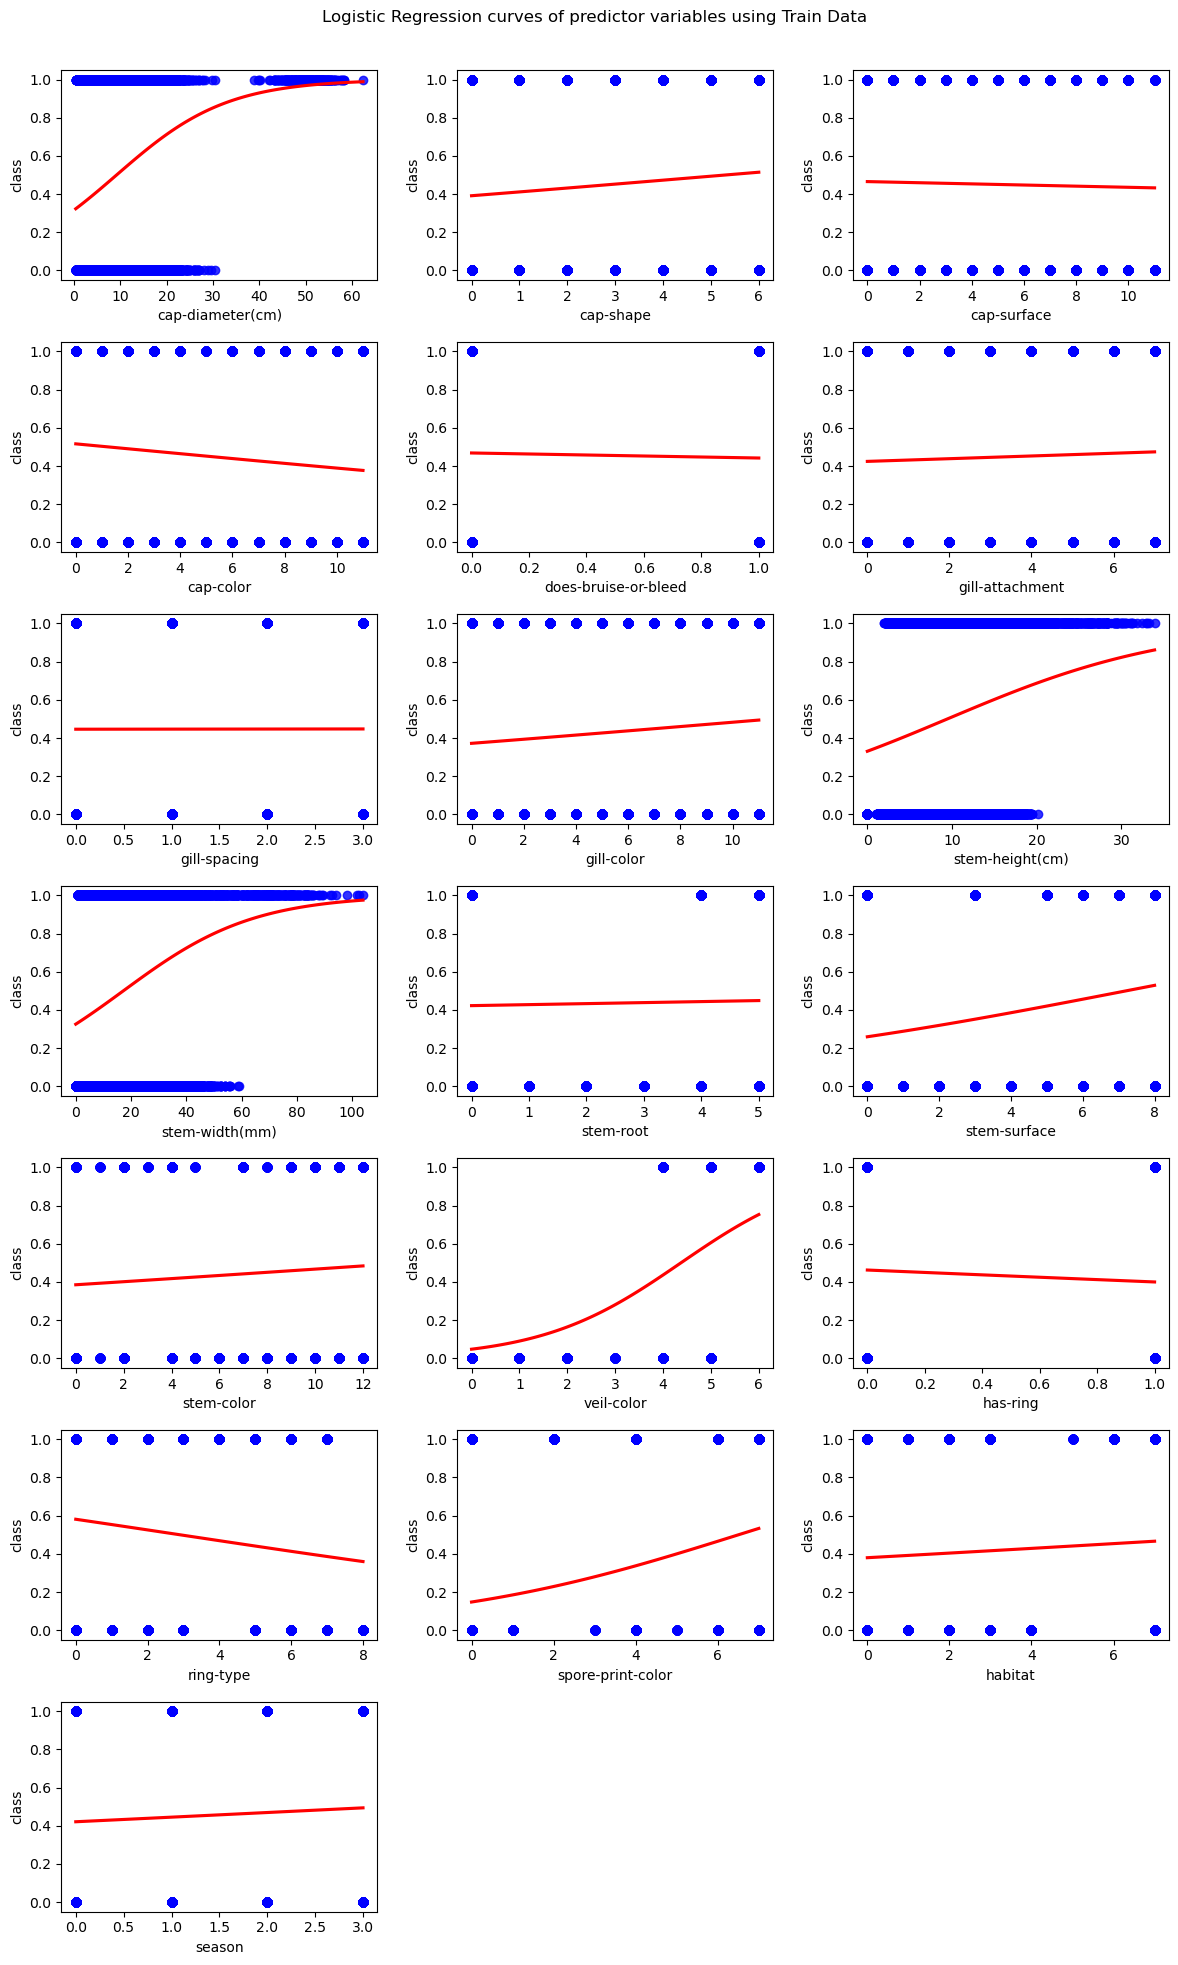

In [34]:
# Predict class of train set using train set of predictor variables using the Logistic Regression model
# Predict class corresponding to the predictors using the logistic model
edible_train_pred = logreg.predict(predictor_train)

# create subplots for each column
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_train.columns):
    sb.regplot(data=predictor_train, x=col, y=edible_train, logistic=True, ci=None,
               scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[i])

    
# add a title and adjust the layout
fig.suptitle('Logistic Regression curves of predictor variables using Train Data')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[20])
fig.delaxes(axes[19])
plt.show()


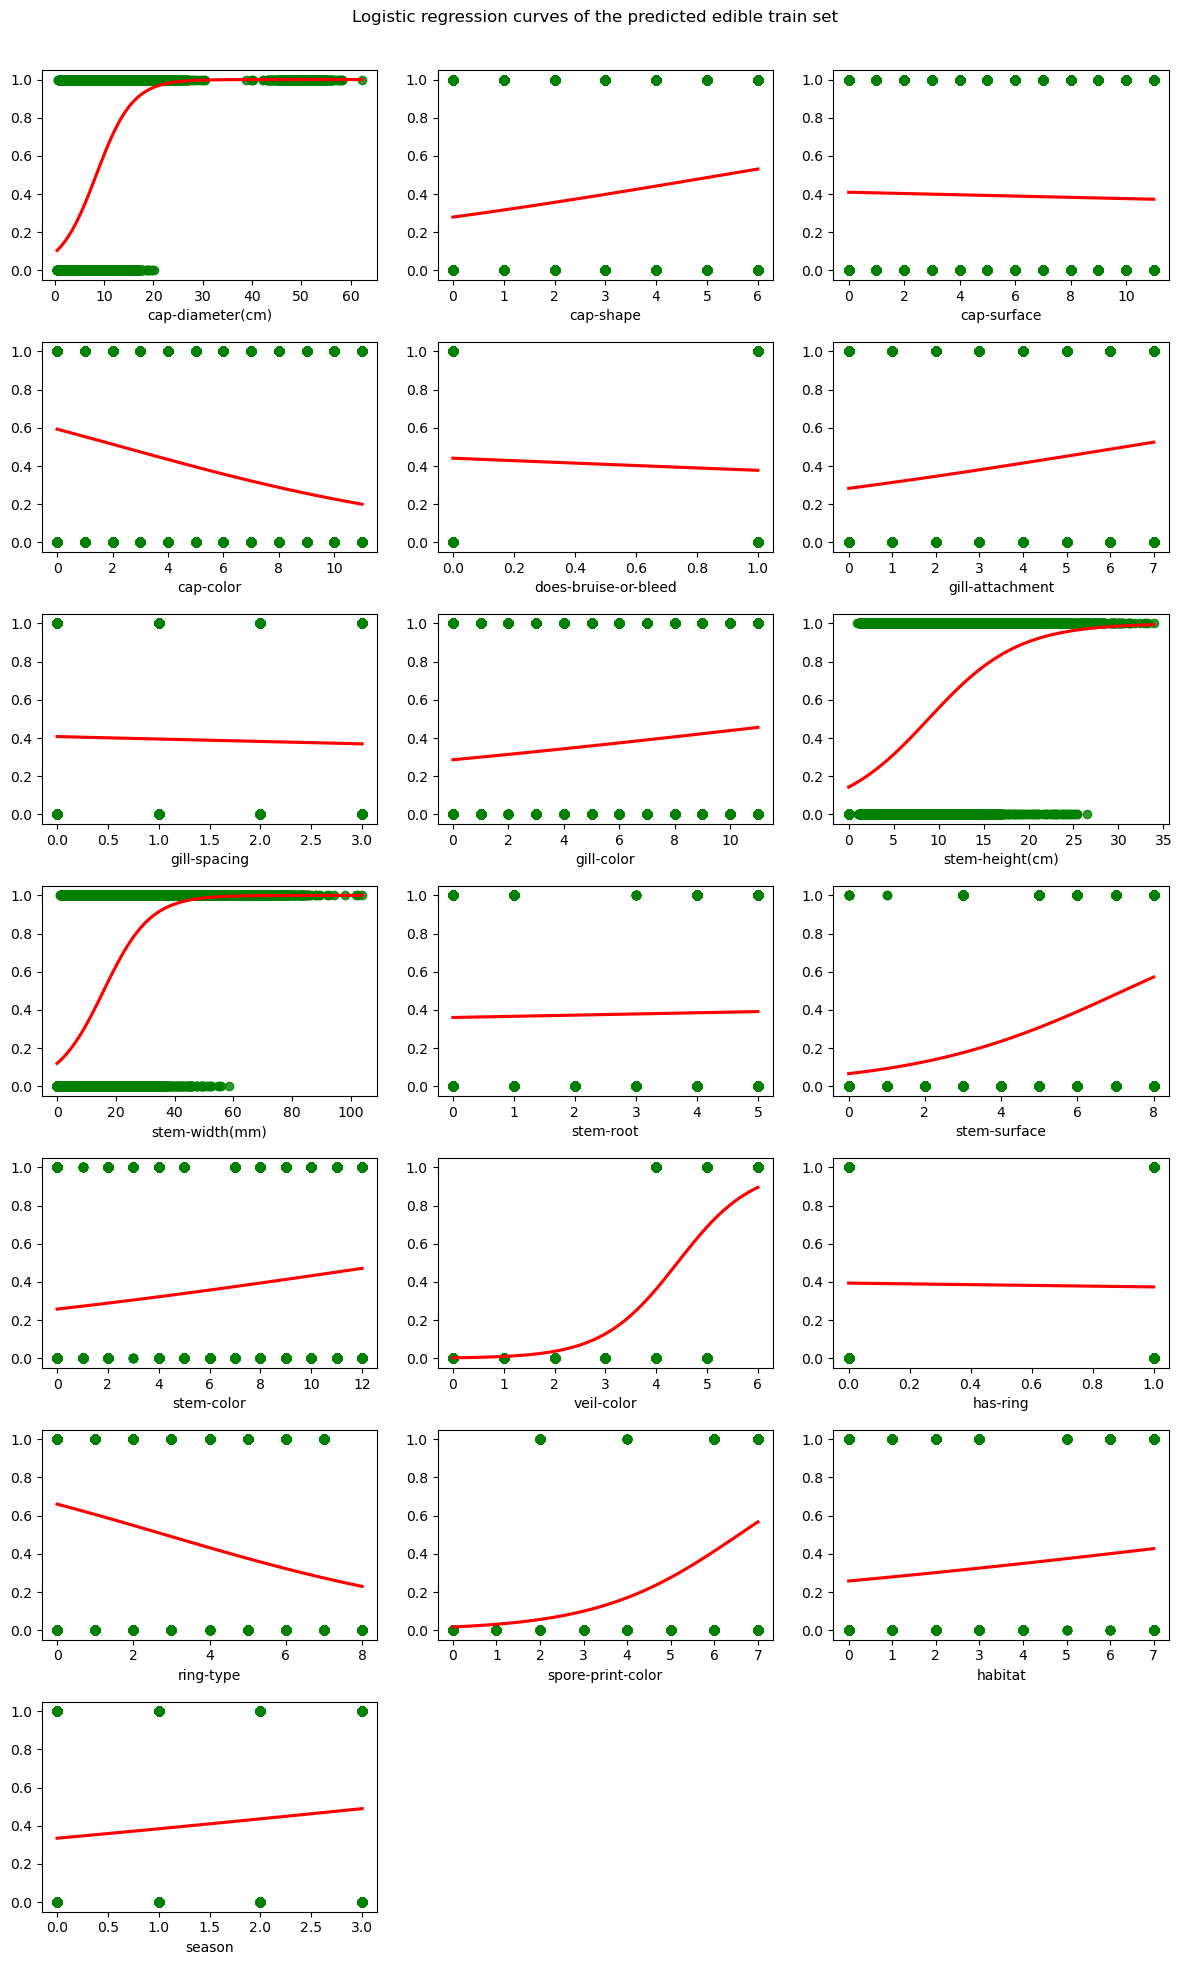

In [35]:
# Plot the logistic regression curve predicted edible train set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_train.columns):
    sb.regplot(data = predictor_train, x = col, y = edible_train_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic regression curves of the predicted edible train set')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[20])
fig.delaxes(axes[19])
plt.show()

Accuracy : 0.666216354518473
              precision    recall  f1-score   support

           0       0.68      0.75      0.71     27030
           1       0.65      0.56      0.60     21825

    accuracy                           0.67     48855
   macro avg       0.66      0.66      0.66     48855
weighted avg       0.66      0.67      0.66     48855



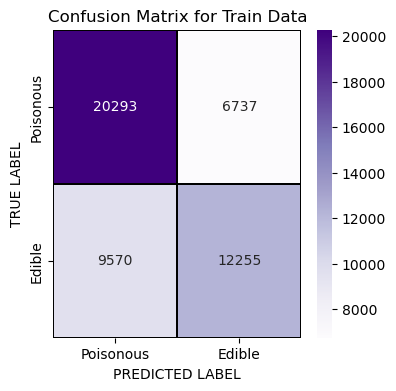

True Positive Rate :  0.5615120274914089
False Positive Rate :  0.24924158342582317


In [36]:
# Print the confusion matrix of the train data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", accuracy_score(edible_train, edible_train_pred))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

cm2train = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm2train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

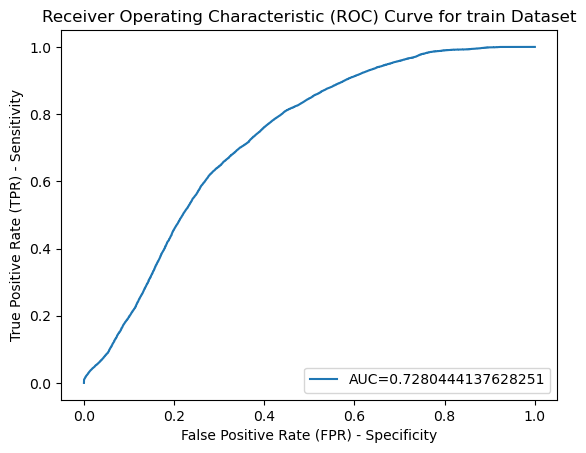

In [37]:
# Define metrics
edible_train_pred_proba = logreg.predict_proba(predictor_train)[::,1]
fpr, tpr, _ = roc_curve(edible_train, edible_train_pred_proba)
auc = roc_auc_score(edible_train, edible_train_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for train Dataset')
plt.show()

### The Test Set

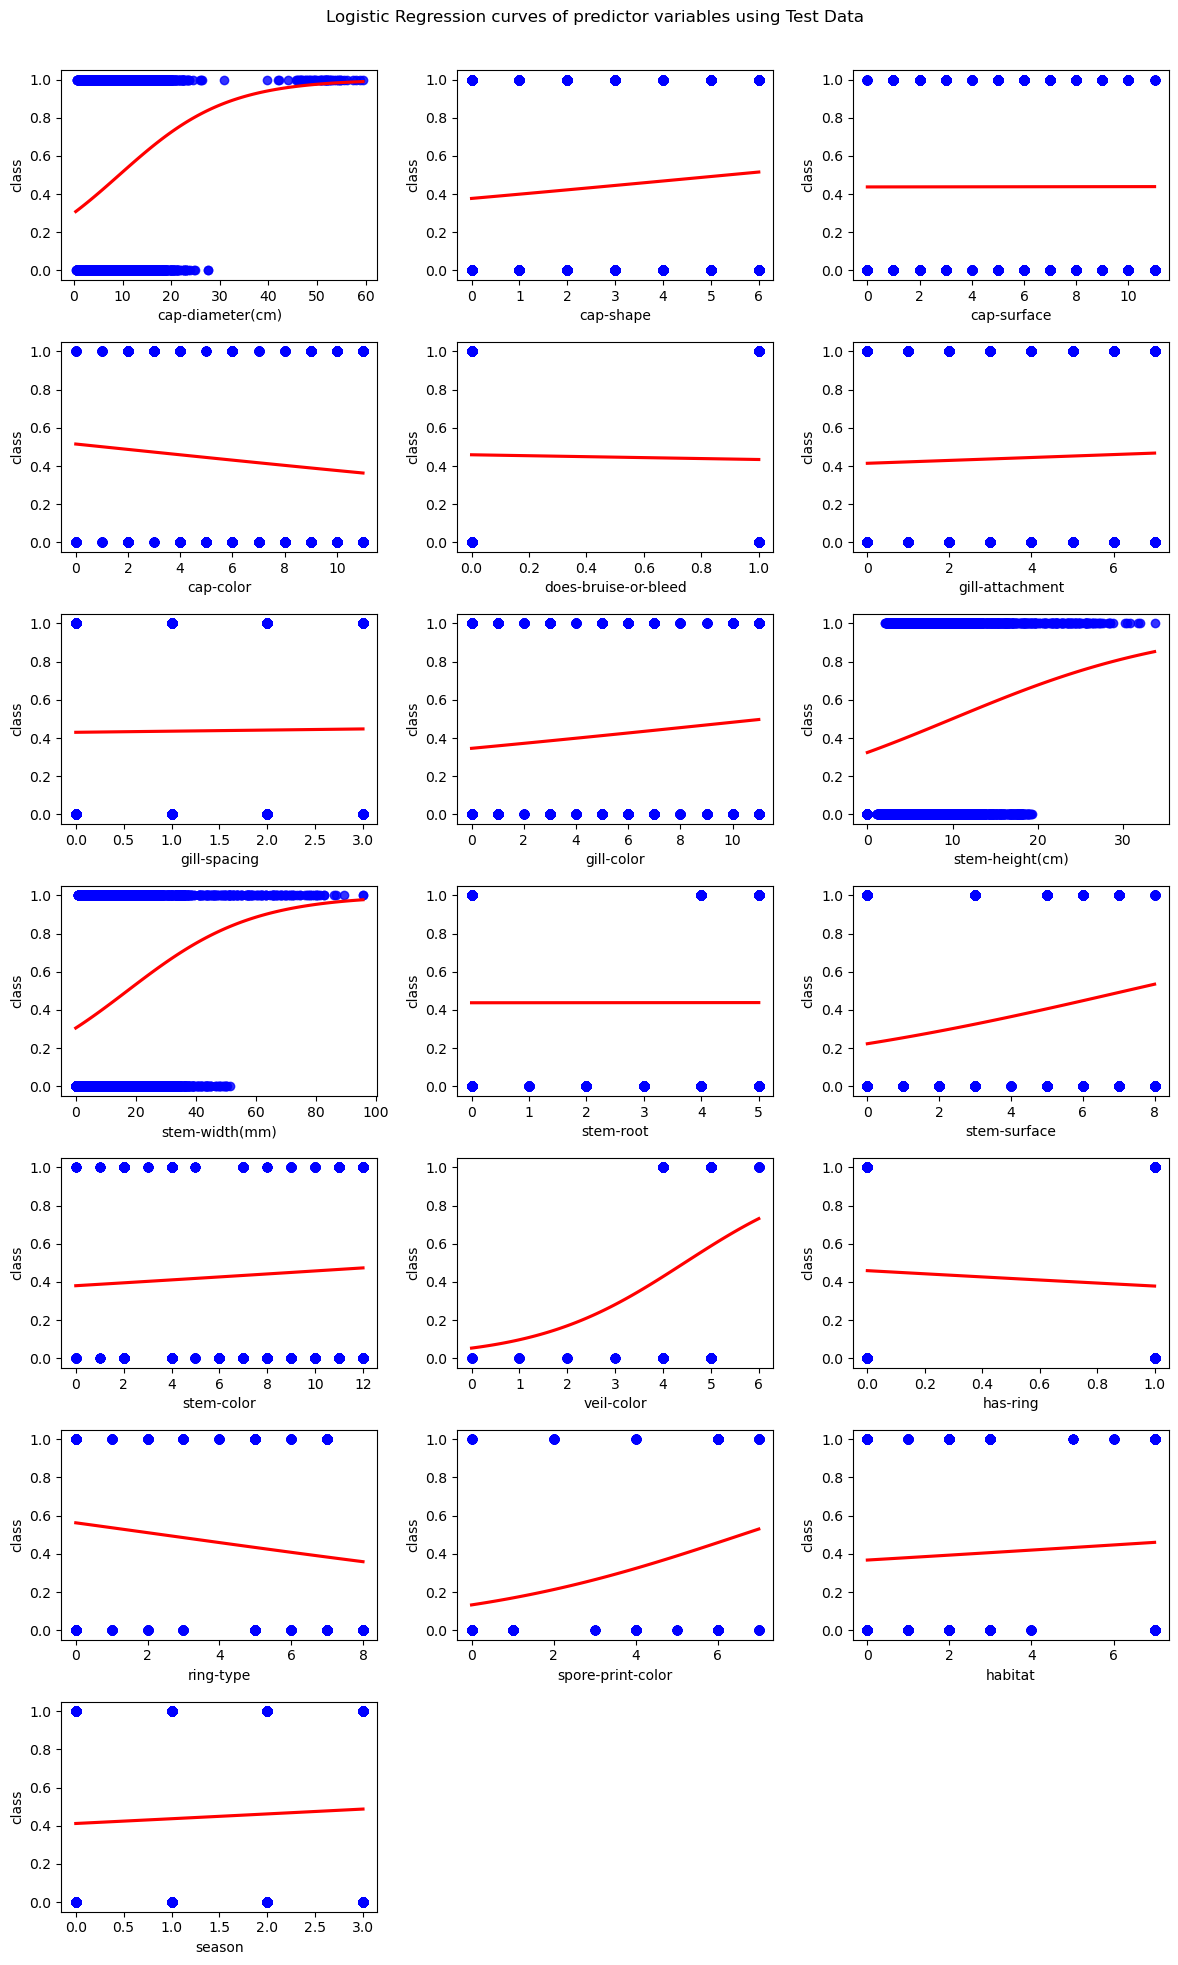

In [38]:
# Predict class of test set using test set of the predictor variables using the Linear Regression model
# Predict class corresponding to the predictors using the logistic model
edible_test_pred = logreg.predict(predictor_test)

# Plot the logistic regression curve of the test data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_test.columns):
    sb.regplot(data=predictor_test, x=col, y=edible_test, logistic=True, ci=None,
               scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic Regression curves of predictor variables using Test Data')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[20])
fig.delaxes(axes[19])
plt.show()


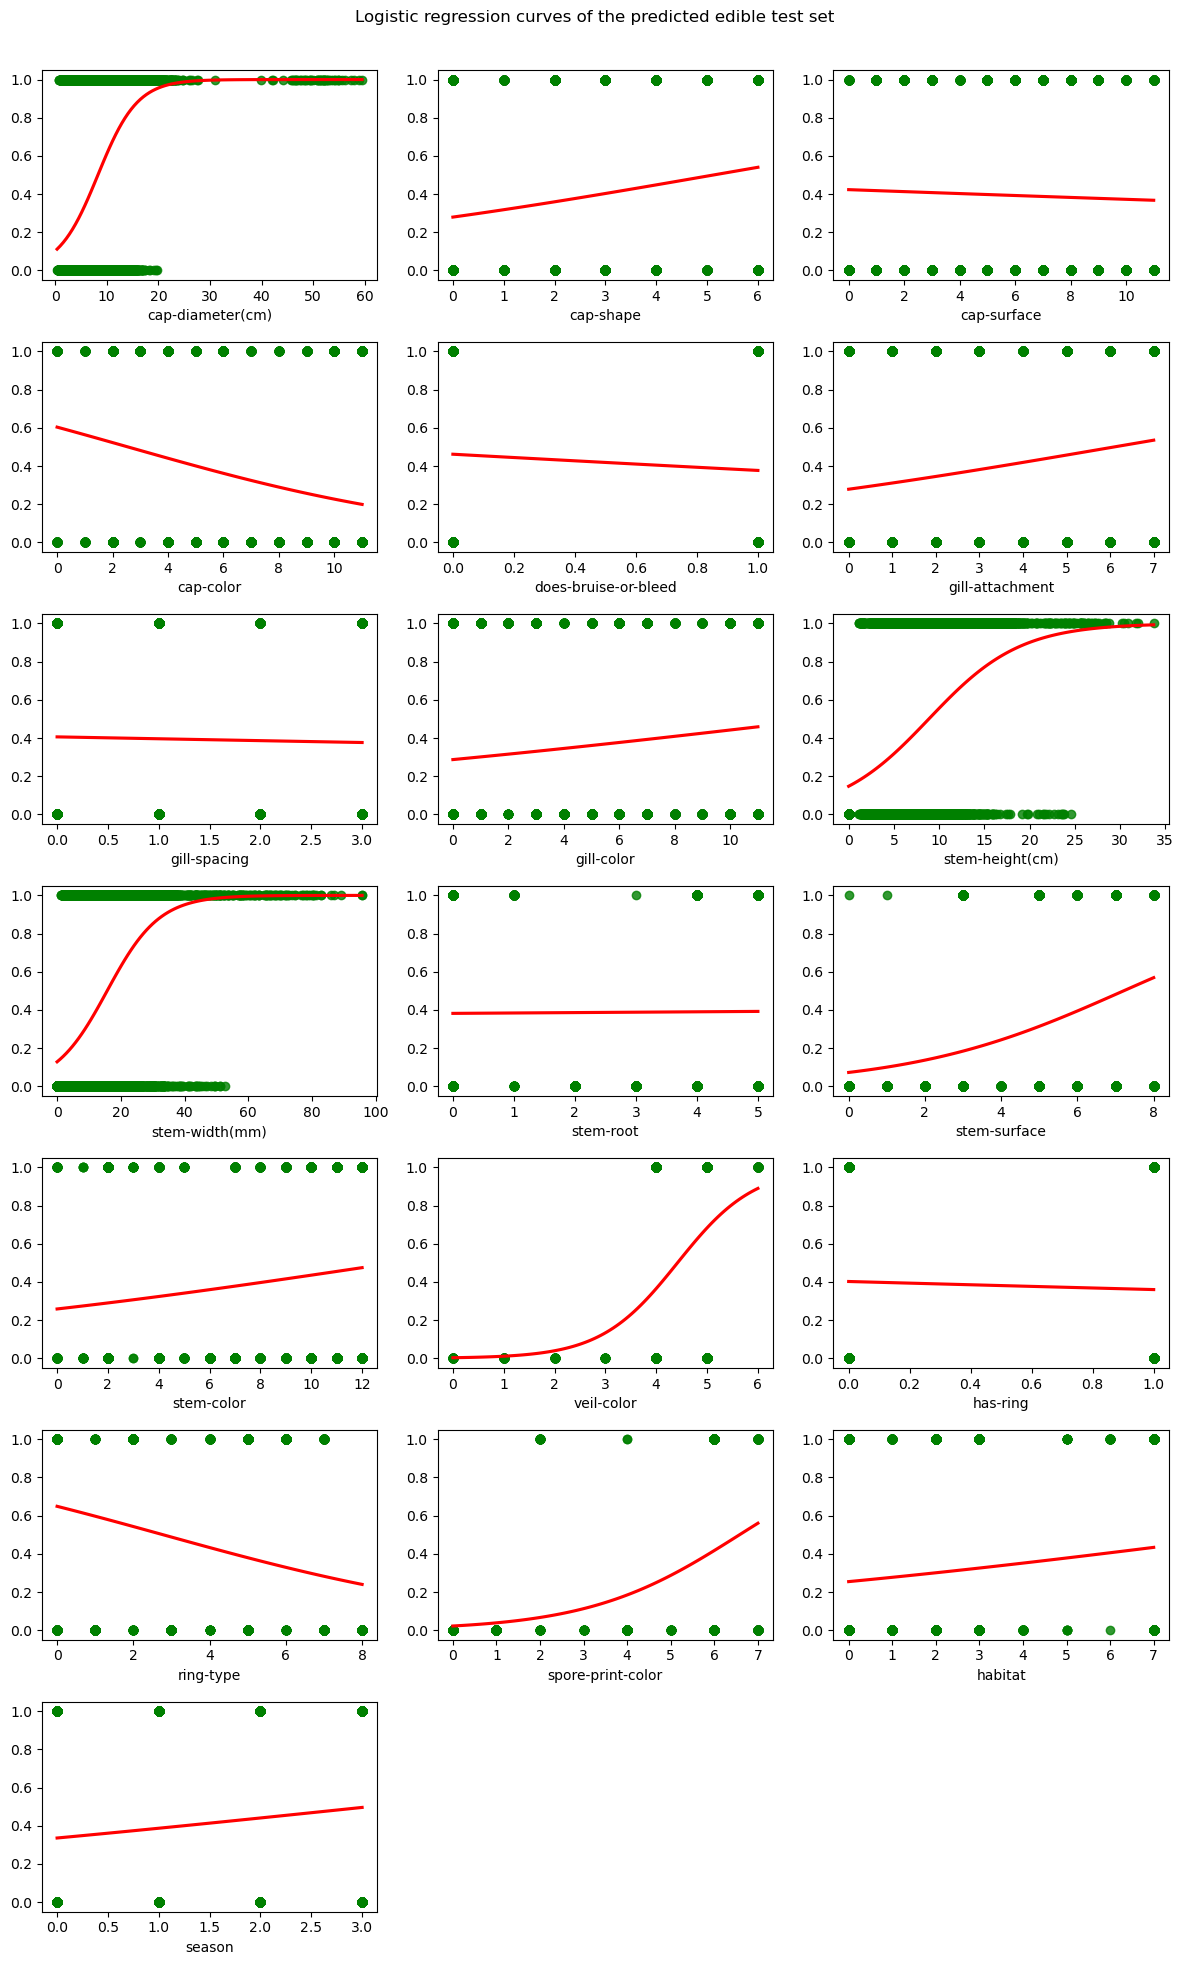

In [39]:
# Plot the logistic regression curve predicted edible test set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_test.columns):
    sb.regplot(data = predictor_test, x = col, y = edible_test_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic regression curves of the predicted edible test set')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[20])
fig.delaxes(axes[19])
plt.show()

Accuracy : 0.6722613394465368
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6858
           1       0.64      0.57      0.61      5356

    accuracy                           0.67     12214
   macro avg       0.67      0.66      0.66     12214
weighted avg       0.67      0.67      0.67     12214



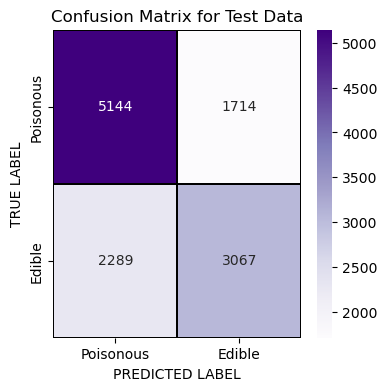

True Positive Rate :  0.5726288274831964
False Positive Rate :  0.2499270924467775


In [40]:
# Print the confusion matrix of the test data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the test set
print("Accuracy :", accuracy_score(edible_test, edible_test_pred))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

cm2test = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm2test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

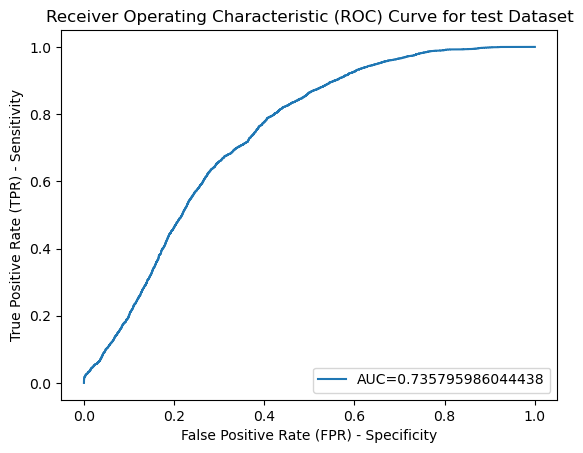

In [41]:
# Define metrics
edible_test_pred_proba = logreg.predict_proba(predictor_test)[::,1]
fpr, tpr, _ = roc_curve(edible_test, edible_test_pred_proba)
auc = roc_auc_score(edible_test, edible_test_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()

### Findings : 

Based on the evaluations done on the Train and Test Datasets:

Predictions on the Train dataset had an accuracy of 0.66622 while 

Predictions on the Test data had an accuracy of 0.67226

We also obtained a better AUC score of 0.73580, which means that the Logistic Regression Model with the best threshold value will result in a higher TPR for the same FPR compared to the Naïve Bayes model.

However, the logistic regression model is not up to our standards as we still have to accept a fairly high FPR if we want a higher TPR. Which means it increases the likelihood of classifying a poisonous mushroom as edible, which may be a life-or-death situation! 



## Model 3 : Decision Tree

The Decision Tree model is a a type of supervised machine learning algorithm that we had learned before in classification and regression tasks. It is basically a a tree-like structure where each internal node represents a decision based on a feature and each leaf node represents a class label or a numerical value.

Decision trees are easy to interpret, able to handle both categorical and numerical data, and are able to capture nonlinear relationships between the features and the target variable. However, they can be prone to overfitting, especially if the tree is too deep. So we will be looking into how to tune the depth of a Decision Tree as part of learning something new!

### The Train Set

In [42]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Assign Response and Predictors
predictor = mushroom_predictors 
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)



Train Set : (48855,) (48855, 19)
Test Set  : (12214,) (12214, 19)


For now we will not assign a value for depth! As we want to find out the maximum depth level for 100% accuracy for TRAINING set.

We will later find the optimal value for depth such that it does not cause OVERFITTING.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

DECISION TREE MAX DEPTH :  17


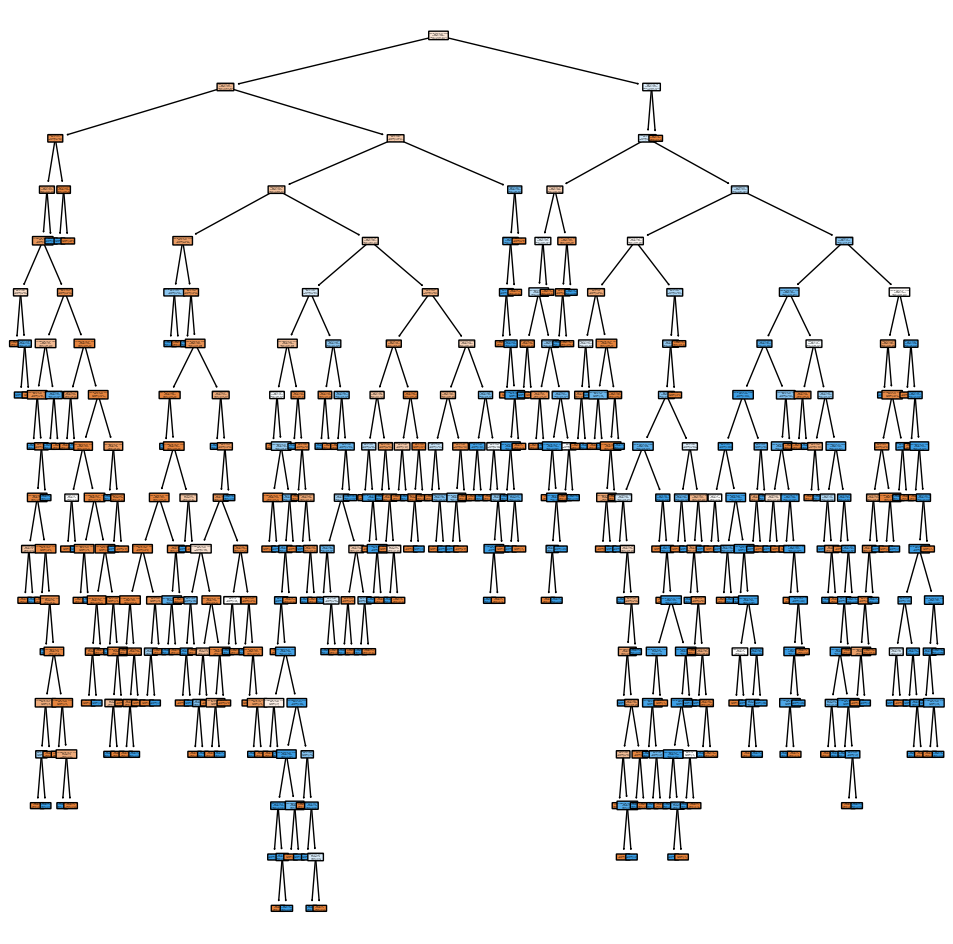

In [43]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = None)  # create the decision tree object
dectree.fit(predictor_train, edible_train)        # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=predictor.columns, 
          class_names=["Poisonous","Edible"])

# Predict Response corresponding to Predictors
edible_train_pred = dectree.predict(predictor_train)
edible_test_pred = dectree.predict(predictor_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(predictor_train, edible_train))
print()

print("DECISION TREE MAX DEPTH : ", dectree.tree_.max_depth)

## OVERFITTING

From above we see the max tree depth for 100% acurracy on training data is 17

However, we cannot simply use a depth of 17 as it can lead to a very deep classification tree with many nodes. This often leads to overfitting on the training dataset, where the model is trained too well on the training data, resulting in poor performance on new or unseen data. The model would become too complex and start to memorize the training data rather than learning to generalize to new data.

This leads to a situation where the model is too tailored to the specific training data and cannot make accurate predictions on new data. 

#### To find best depth value, we utilise cross validation.

Since max depth = 17

We will use a range of (1,17) for depth and determine the best_depth_value.


In [45]:
best_depth_value = 0
best_score = 0

for i in range(1,17):
    dectree = DecisionTreeClassifier(max_depth = i)
    dectree.fit(predictor_train, edible_train)
    if dectree.score(predictor_test, edible_test) > best_score:
        best_score = dectree.score(predictor_train, edible_train)
        best_depth_value = i
        
print("Best Depth Value: {}".format(best_depth_value))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best Depth Value: 15
Test Accuracy: 99.96%


Best Depth value is 15, with a test accuracy of 99.96%.

### The Test Set

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9976256754543966



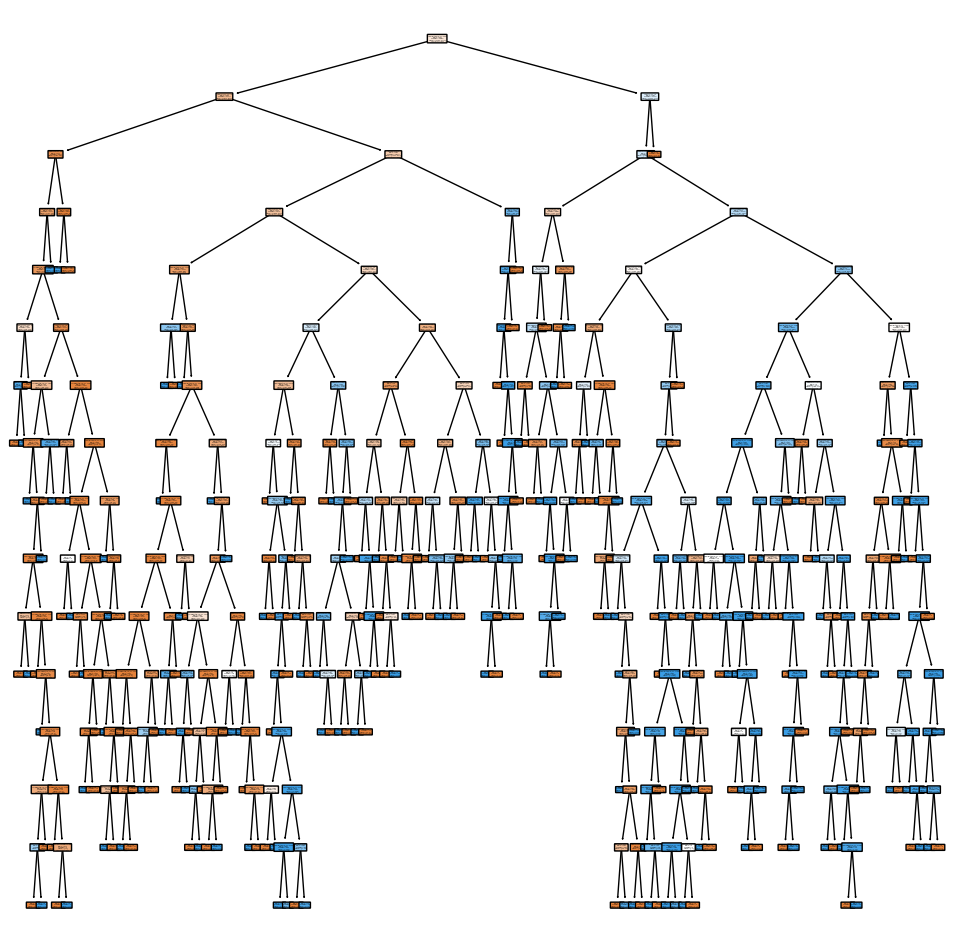

In [46]:
#Creating new dectree with best max_depth = 15
dectree = DecisionTreeClassifier(max_depth = 15)  # create the decision tree object
dectree.fit(predictor_train, edible_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=predictor.columns, 
          class_names=["Poisonous","Edible"])

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(predictor_test, edible_test))
print()


Goodness of Fit of Model 	Train Dataset
Accuracy 	: 0.999590625319824
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27162
           1       1.00      1.00      1.00     21693

    accuracy                           1.00     48855
   macro avg       1.00      1.00      1.00     48855
weighted avg       1.00      1.00      1.00     48855



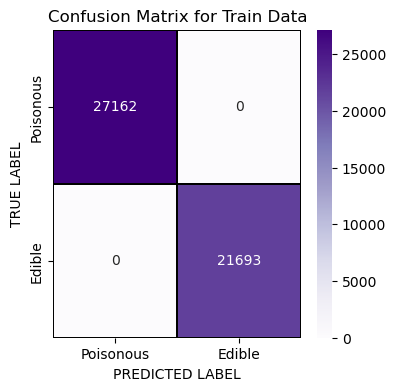

True Positive Rate :  1.0
False Positive Rate :  0.0
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9976256754543966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6726
           1       1.00      1.00      1.00      5488

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



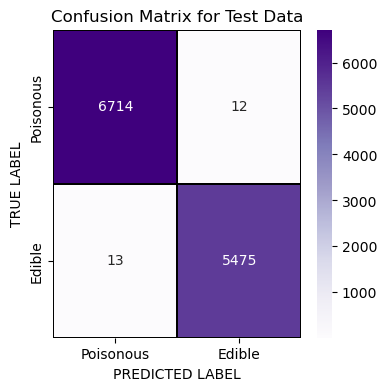

True Positive Rate :  0.997631195335277
False Positive Rate :  0.001784121320249777


In [47]:
# Plot the Confusion Matrix for Train and Test

x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy \t:", dectree.score(predictor_train, edible_train))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

cm3train = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm3train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)


print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(predictor_test, edible_test))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

cm3test = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm3test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

### Findings : 

Based on the evaluations done on the Train and Test Datasets:

Predictions on the Train dataset had an accuracy of 0.99959 while 

Predictions on the Test data had an accuracy of 0.99763

Furthermore achieving a high TPR with a very low FPR! This means the likelihood of eating a poisonous mushroom predicted as edible is slim to none!

The Decision Tree model has worked exceedingly well.

However, we also wish to improve the Naïve Bayes and Logistic Regression models as well.


# Optimising our Machine Learning Algorithms


To improve our Naïve Bayes Model and Logistic Regression Model, we have decided to go through the process of Feature Selection.

We believe that because we have a large amount of predictors at 19, and because some nominal categories have no inherent relationship with the response variable class, they might not have predictive value and can introduce noise and reduce the accuracy of the model.

It may be reasonable to remove these categories from the machine learning model

In Feature selection, we will identify and retain the most important features, while discarding the least important ones


## Ranking Feature Importance 

We will be getting the feature importance scores from the decision tree model since it currently performs the best.

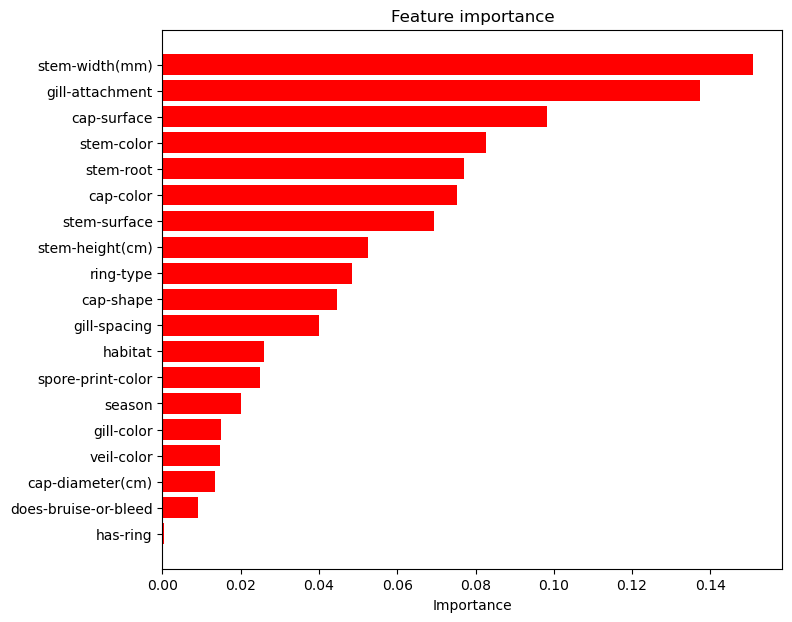

has-ring 0.0003174
does-bruise-or-bleed 0.0090603
cap-diameter(cm) 0.0133791
veil-color 0.0147053
gill-color 0.0148885
season 0.0201012
spore-print-color 0.0248318
habitat 0.0259587
gill-spacing 0.0399885
cap-shape 0.0446037
ring-type 0.0483127
stem-height(cm) 0.0525963
stem-surface 0.0695166
cap-color 0.0753564
stem-root 0.0770286
stem-color 0.0827186
cap-surface 0.0982848
gill-attachment 0.1374487
stem-width(mm) 0.1509029
Average feature importance value:  0.0526316


In [48]:
features_list = mushroom_predictors.columns.values
feature_importance = dectree.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()


for idx in sorted_idx:
    print(features_list[idx], round(feature_importance[idx], 7))

feature_importance_avg = sum(feature_importance)/len(feature_importance)
print("Average feature importance value: ", round(feature_importance_avg,7))

From the ***Feature importance selector***, we see that the top 6 features with high Importance Values are :
1. stem-width(mm)
2. gill-attachment
3. cap-surface
4. stem-color
5. stem-root
6. cap-color

Comparing it with the relatively higher correlated variables picked up from ***Cramer's V***:

1. stem-color(0.07)
2. stem-surface(0.07)
3. cap-color(0.06)
4. cap-surface(0.05)
5. gill-attachment(0.05)
6. stem-root(0.05) 

And the relatively higher correlated variables picked up from the ***Correlation Matrix***:
1. cap-surface (0.11)
2. does-bruise-or-bleed(-0.18)
3. gill-spacing (-0.81)
4. gill-color (0.098)
5. spore-print-color (0.13)
6. habitat(0.11)

Comparing these 3 correlation insights, we see that Cramer's V and the Feature Importance selector actually have many similar features that they picked up to be important. They picked up these 5 : 
1. stem-color
2. cap-color
3. cap-surface
4. gill-attachment
5. stem-root 

Whereas for those selected by the ***Correlation Matrix***, there was only cap-surface that it managed to pick out. 

This could perhaps show that ***Cramer's V*** and ***Feature Importance selector*** from decision tree are more reliable.

We will now only use those predictors selected by the two of them and use them in our models again, where we select features with Importance Values equal or greater than the average from the ***Feature importance selector***, and also the 6 from the ***Cramer's V***.

In total we are left with these 13 predictors .
1. stem-width(mm)
2. gill-attachment
3. cap-surface
4. stem-color
5. stem-root
6. cap-color
7. stem-surface
8. stem-height(cm)
9. gill-spacing
10. ring-type
11. cap-shape
12. spore-print-color
13. habitat 

we will then discard the other 6 variables 
1. veil-color 
2. has-ring 
3. season 
4. does-bruise-or-bleed 
5. gill-color 
6. cap-diameter(cm) 



In [49]:
# Creating new data frame with only these 13 variables

refined_mushroom_predictors = mushroom_predictors.copy()
refined_mushroom_predictors.drop(['veil-color','has-ring','season','does-bruise-or-bleed','gill-color','cap-diameter(cm)'], axis=1,inplace=True)
refined_mushroom_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cap-shape          61069 non-null  int32  
 1   cap-surface        61069 non-null  int32  
 2   cap-color          61069 non-null  int32  
 3   gill-attachment    61069 non-null  int32  
 4   gill-spacing       61069 non-null  int32  
 5   stem-height(cm)    61069 non-null  float64
 6   stem-width(mm)     61069 non-null  float64
 7   stem-root          61069 non-null  int32  
 8   stem-surface       61069 non-null  int32  
 9   stem-color         61069 non-null  int32  
 10  ring-type          61069 non-null  int32  
 11  spore-print-color  61069 non-null  int32  
 12  habitat            61069 non-null  int32  
dtypes: float64(2), int32(11)
memory usage: 3.5 MB


## Naïve Bayes Classifier (Attempt 2)

In [50]:
# Extract the variables and the associated data as a dataframe
predictor = refined_mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

# Here we use Gaussian Naïve Bayes, which implements the Gaussian Naïve Bayes algorithm for classification.
# We import the GaussianNB package from the sklearn.naive_bayes module

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# We fit the model with the defined Train data
nb.fit(predictor_train, edible_train.values.ravel())


Train Set : (48855,) (48855, 13)
Test Set  : (12214,) (12214, 13)


GaussianNB()

### The Train Set


Accuracy:  0.6307235697472111
Naive Bayes Classification report for Train data (actual vs predicted): 

               precision    recall  f1-score   support

           0       0.73      0.53      0.61     27055
           1       0.56      0.76      0.65     21800

    accuracy                           0.63     48855
   macro avg       0.65      0.64      0.63     48855
weighted avg       0.66      0.63      0.63     48855



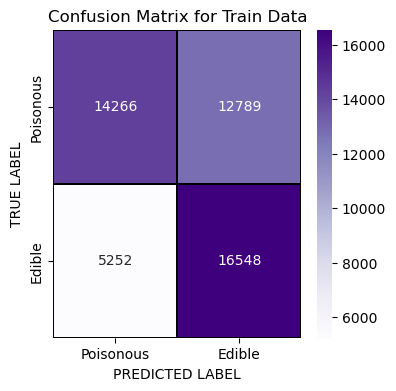

True Positive Rate :  0.7590825688073395
False Positive Rate :  0.47270375161707634
AUC: 0.6845791


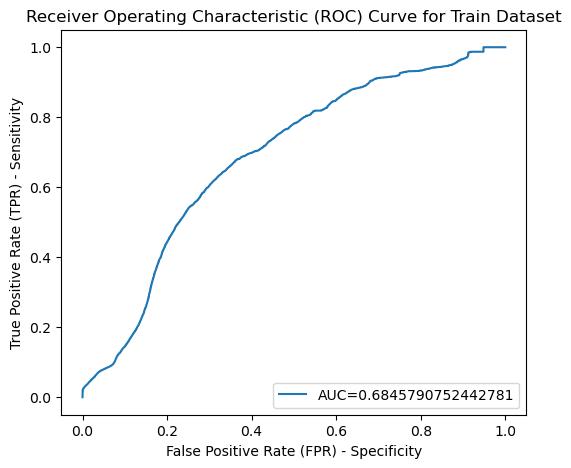

In [51]:
 # First make predictions on the train set
edible_train_pred = nb.predict(predictor_train)

# Evaluate the model by checking the accuracy of the predicted train data against the actual train data
accuracy = accuracy_score(edible_train, edible_train_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naïve Bayes Classification report for Train data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1train = confusion_matrix(edible_train, edible_train_pred)

x_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1
y_axis_labels = ["Poisonous", "Edible"] # "Poisonous" is encoded as 0, "Edible" is encoded as 1

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Calculating the AUC of the Train dataset
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_train)
edible_train_prob = predicted_prob[:, 1]
fpr, tpr, thresholds = roc_curve(edible_train, edible_train_prob, pos_label=1)

# here we assign the predicted probabilities of the train set into y_true
y_true = (edible_train == 1).astype(int)
auc = roc_auc_score(y_true, edible_train_prob)
print("AUC: {:.7f}".format(auc))

fig = plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Dataset')
plt.show()





### The Test Set


Accuracy:  0.6304241034878009
Naive Bayes Classification report for Test data (actual vs predicted): 

               precision    recall  f1-score   support

           0       0.73      0.53      0.61     27055
           1       0.56      0.76      0.65     21800

    accuracy                           0.63     48855
   macro avg       0.65      0.64      0.63     48855
weighted avg       0.66      0.63      0.63     48855



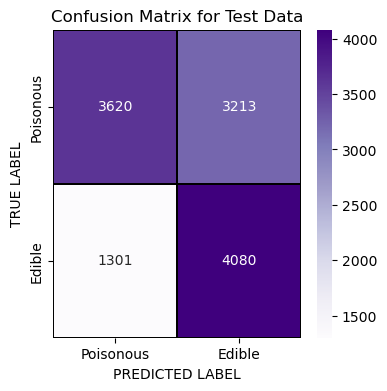

True Positive Rate :  0.7582233785541721
False Positive Rate :  0.4702180594175326
AUC: 0.6873393


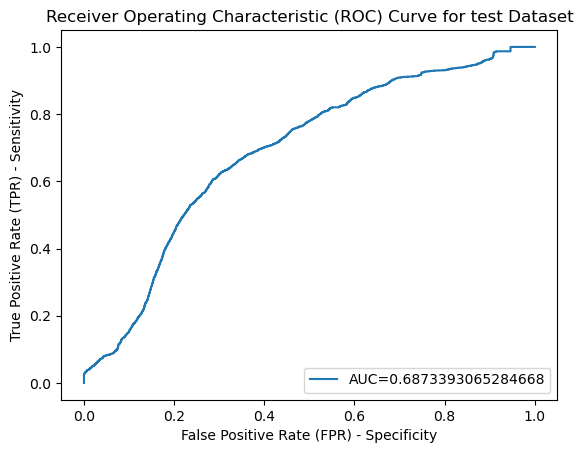

In [52]:
# After making predictions on the train set, we make predictions on the test set
edible_test_pred = nb.predict(predictor_test)

# Evaluate the model again by checking the accuracy of the predicted test data against the actual test data
accuracy = accuracy_score(edible_test, edible_test_pred)
print("Accuracy: ", accuracy)

# Print out classification report
print("Naïve Bayes Classification report for Test data (actual vs predicted): \n\n", classification_report(edible_train, edible_train_pred))

# Print out confusion matrix
cm1test = confusion_matrix(edible_test, edible_test_pred)

x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm1test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Predict the probabilities of edible class for the test data
# Edible class is encoded as 1
predicted_prob = nb.predict_proba(predictor_test)
edible_test_prob = predicted_prob[:, 1]
fpr, tpr, thresholds = roc_curve(edible_test, edible_test_prob, pos_label=1)

# Calculating the AUC of the Test dataset
y_true = (edible_test == 1).astype(int)
auc = roc_auc_score(y_true, edible_test_prob)
print("AUC: {:.7f}".format(auc))

plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()




## Logistic Regression (Attempt 2)


In [53]:
predictor = refined_mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

# Create the Logistic Regression object with the maximum iteration of 61069 which is the total number of rows
logreg = LogisticRegression(max_iter = 61069)

# Fit the Logistic Regression model using the train dataset
logreg.fit(predictor_train, edible_train.values.ravel())

# Coefficients of the Logistic Regression
print('Intercept \t: ', logreg.intercept_)
print('Coefficients \t:', logreg.coef_)



Train Set : (48855,) (48855, 13)
Test Set  : (12214,) (12214, 13)
Intercept 	:  [-2.83540006]
Coefficients 	: [[ 0.01922933 -0.02506699 -0.08170196  0.01816954 -0.05929484  0.03900228
   0.03342851  0.05502223  0.13573394  0.03484077 -0.09645283  0.28763581
   0.00975021]]


### The Train Set

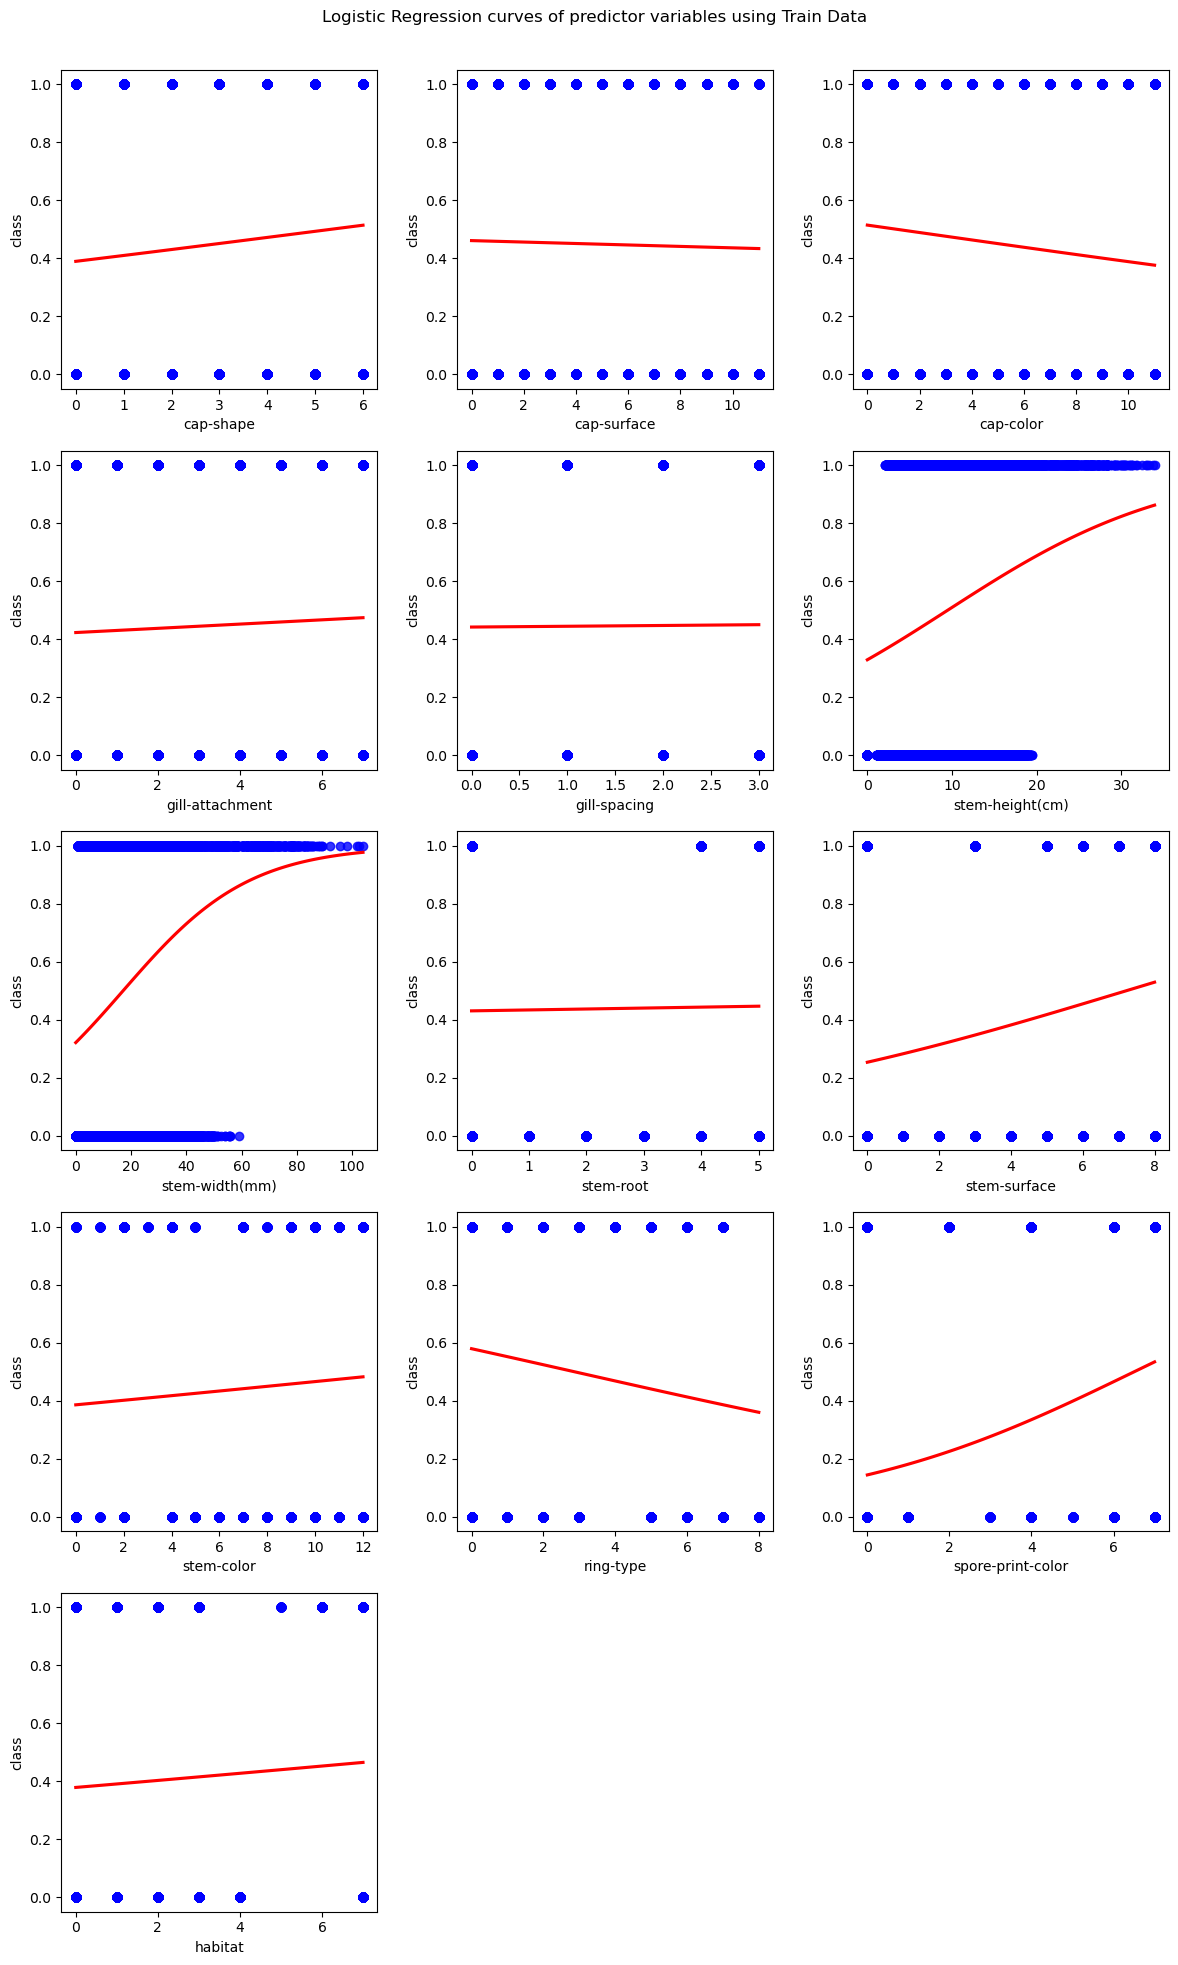

In [54]:
# Predict class of train set using train set of predictor variables using the Logistic Regression model
# Predict class corresponding to the predictors using the logistic model
edible_train_pred = logreg.predict(predictor_train)


# Plot the logistic regression curve of the train data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve

# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_train.columns):
    sb.regplot(data=predictor_train, x=col, y=edible_train, logistic=True, ci=None,
               scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[i])

    
# add a title and adjust the layout
fig.suptitle('Logistic Regression curves of predictor variables using Train Data')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()



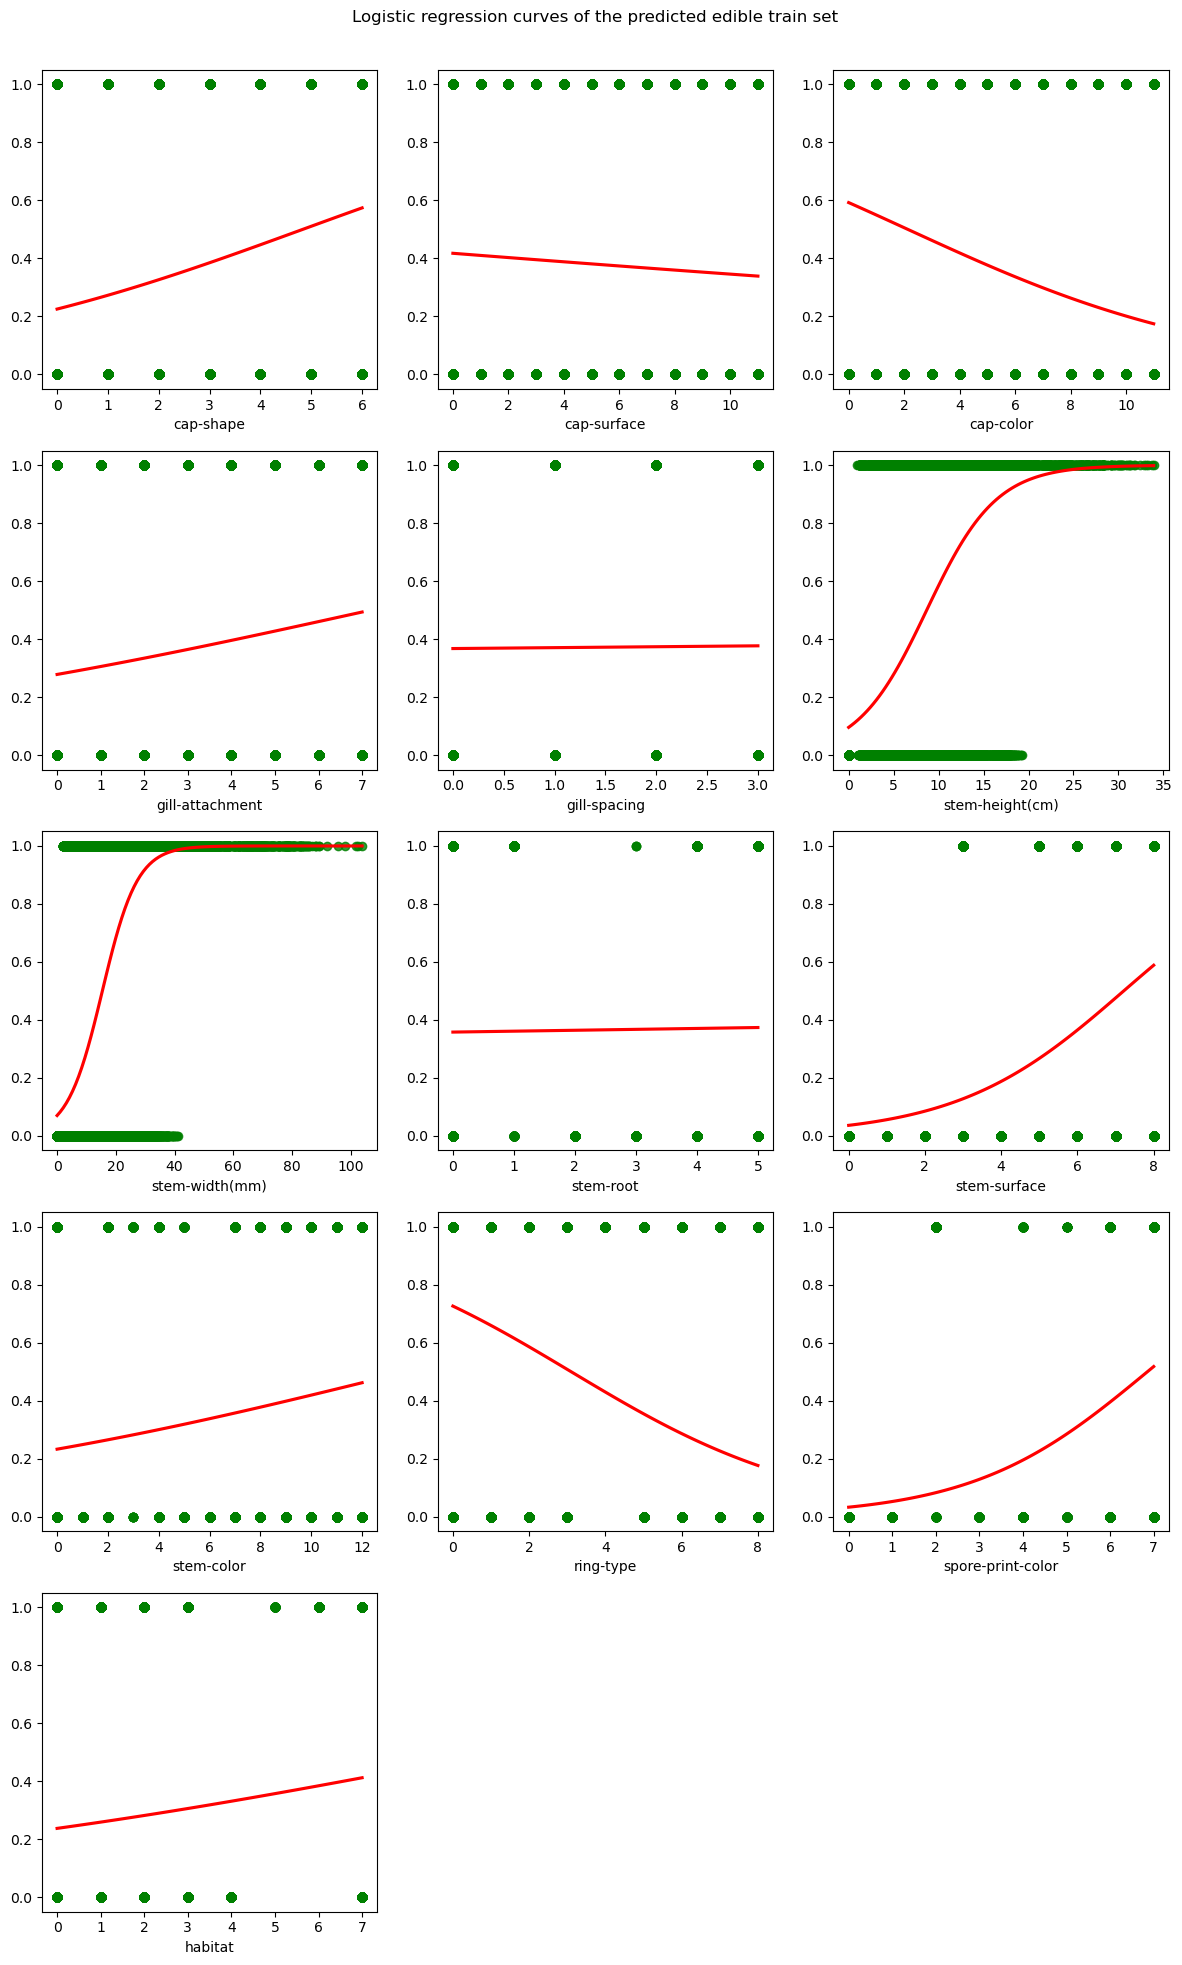

In [55]:
# Plot the logistic regression curve of the predicted edible train set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_train.columns):
    sb.regplot(data = predictor_train, x = col, y = edible_train_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic regression curves of the predicted edible train set')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()

Accuracy : 0.6411830928257087
              precision    recall  f1-score   support

           0       0.66      0.74      0.70     27084
           1       0.62      0.51      0.56     21771

    accuracy                           0.64     48855
   macro avg       0.64      0.63      0.63     48855
weighted avg       0.64      0.64      0.64     48855



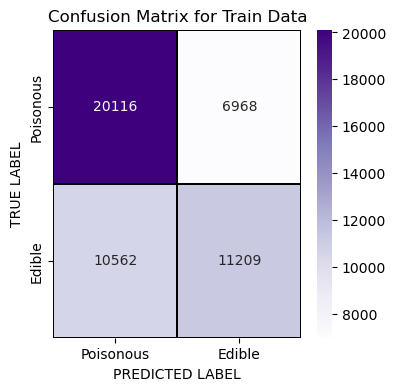

True Positive Rate :  0.5148592163887741
False Positive Rate :  0.2572736671097327


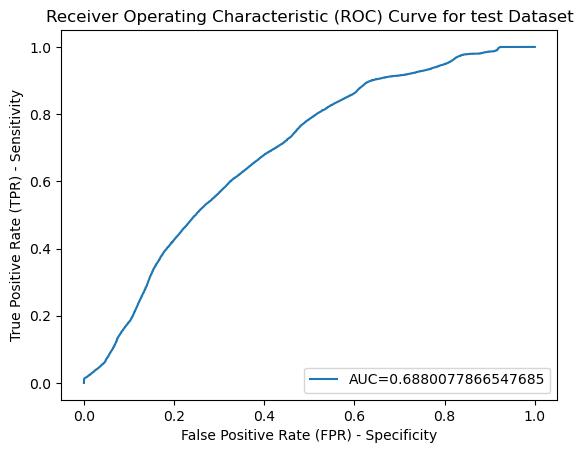

In [56]:
# Print the confusion matrix of the train data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", accuracy_score(edible_train, edible_train_pred))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

cm2train = confusion_matrix(edible_train, edible_train_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm2train, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Define metrics
edible_train_pred_proba = logreg.predict_proba(predictor_train)[::,1]
fpr, tpr, _ = roc_curve(edible_train, edible_train_pred_proba)
auc = roc_auc_score(edible_train, edible_train_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()

### The Test Set

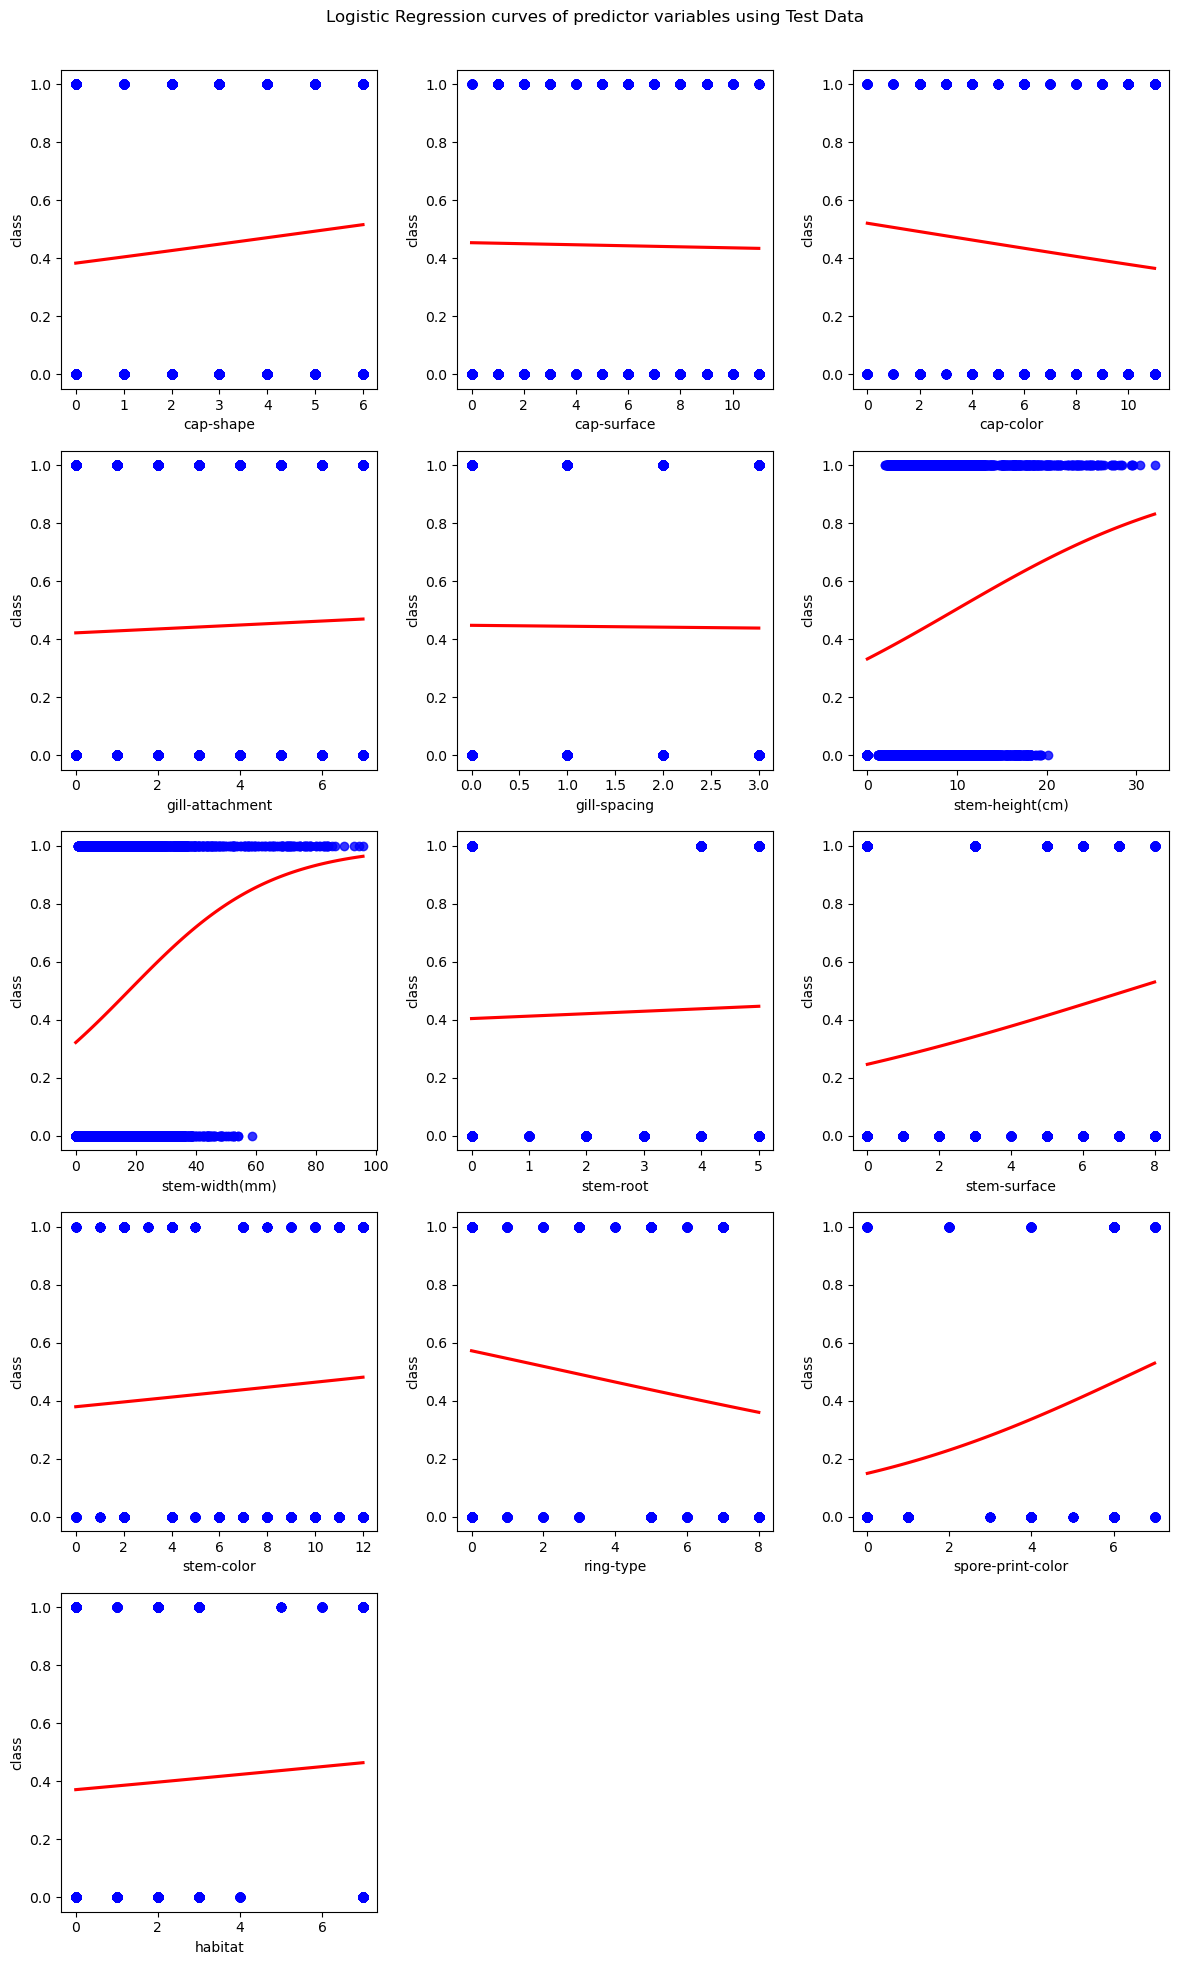

In [57]:
# Predict class of test set using test set of the predictor variables using the Linear Regression model
# Predict class corresponding to the predictors using the logistic model
edible_test_pred = logreg.predict(predictor_test)

# Plot the logistic regression curve of the test data set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_test.columns):
    sb.regplot(data=predictor_test, x=col, y=edible_test, logistic=True, ci=None,
               scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic Regression curves of predictor variables using Test Data')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()


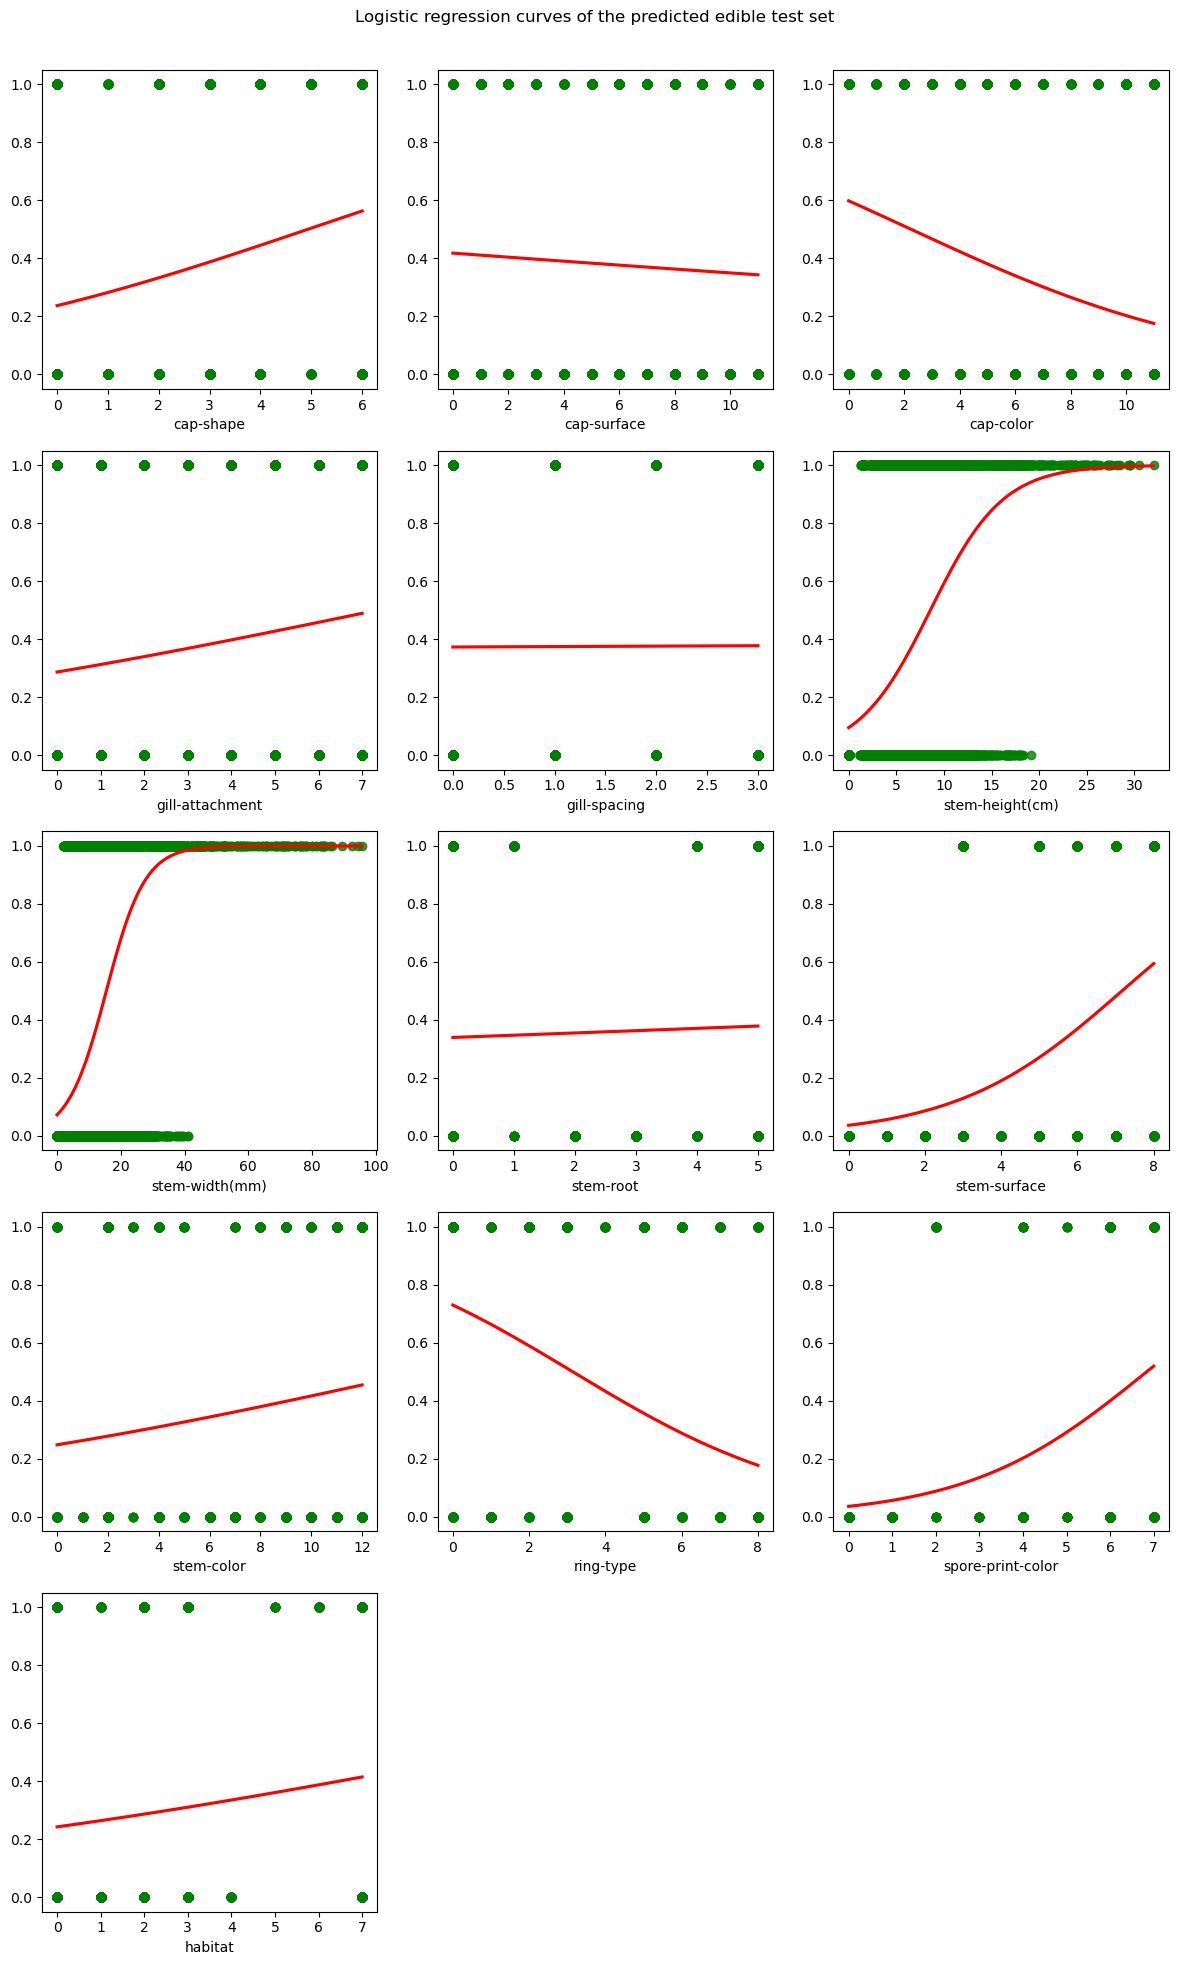

In [58]:
# Plot the logistic regression curve predicted edible test set
# scatter_kws to modify the colour of the points and line_kws to modify the color of the curve
# create subplots for each column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,20))
axes = axes.flatten()
for i, col in enumerate(predictor_test.columns):
    sb.regplot(data = predictor_test, x = col, y = edible_test_pred, logistic = True, ci = None,
          scatter_kws = {'color':'green'}, line_kws={'color':'red'}, ax=axes[i])
    
# add a title and adjust the layout
fig.suptitle('Logistic regression curves of the predicted edible test set')
fig.tight_layout()
plt.subplots_adjust(top=0.95)
fig.delaxes(axes[13])
fig.delaxes(axes[14])
plt.show()

Accuracy : 0.642705092516784
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      6804
           1       0.61      0.52      0.56      5410

    accuracy                           0.64     12214
   macro avg       0.64      0.63      0.63     12214
weighted avg       0.64      0.64      0.64     12214



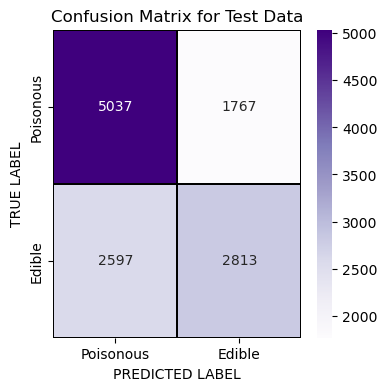

True Positive Rate :  0.5199630314232903
False Positive Rate :  0.25970017636684306


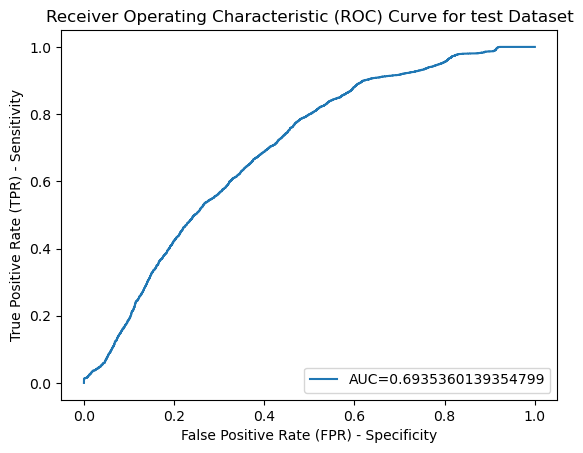

In [59]:
# Print the confusion matrix of the test data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the test set
print("Accuracy :", accuracy_score(edible_test, edible_test_pred))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

cm2test = confusion_matrix(edible_test, edible_test_pred)
f, ax = plt.subplots(figsize =(4,4))
sb.heatmap(cm2test, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)

# Define metrics
edible_test_pred_proba = logreg.predict_proba(predictor_test)[::,1]
fpr, tpr, _ = roc_curve(edible_test, edible_test_pred_proba)
auc = roc_auc_score(edible_test, edible_test_pred_proba)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (FPR) - Specificity')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve for test Dataset')
plt.show()

### Findings : 

Based on the evaluations done on the Train and Test Datasets using the ***Naïve Bayes Model***:

Predictions on the Train dataset had an accuracy of 0.63072 compared to previous value of 0.64116

Predictions on the Test data had an accuracy of 0.63042 compared to previous value of 0.64123

However, a insignificant increase in AUC score from 0.68420 to 0.68734

Based on the evaluations done on the Train and Test Datasets using the ***Logistic Regression Model***:

Predictions on the Train dataset had an accuracy of 0.64118 compared to previous value of 0.66622

Predictions on the Test data had an accuracy of 0.64271 compared to previous value of 0.67226

Also, a decrease in AUC score from 0.73580 to 0.69354

Unfortunately, it seems that only using the features deemed more important has led to a decrease in accuracy of 0.1%-2.9% across both models. 

Furthermore, AUC scores for both models have also generally decreased.

We proceeded to consider why these 2 models were not working optimally despite trying to optimise them. We then theorised that it may be because our nominal categorical variables have non-linear relationships, which would also explain the low correlation values in our Data Exploratory Analysis and also the better performance of the Decision Tree. Maybe these 2 models were not able to appropriately capture these non-linear relationships of our nominal categorical variables. 

We decided to look for a model that is able to capture complex non-linear relationships, and after much searching, we found and implemented this new model: ***Support Vector Machines (SVMs)*** using the **Radial Basis Function (RBF) kernel** to test our theory. The new model should be able to capture complex non-linear relationships in data.



## Model 4: Support Vector Machines

Support Vector Machines is a supervised machine learning and is generally used for classification problems as it can handle multiple continuous and categorical variables.

SVMs work by finding the optimal hyperplane (decision boundary) that separates the data points of different classes with the maximum margin. SVMs use kernels to transform the original data to a higher-dimensional space, where a hyperplane can better separate the data points of different classes. The two most commonly used SVM kernels are the linear kernel and the Radial Basis Function (RBF) kernel.

Focusing on the **Radial Basis Function (RBF) kernel**, it is used when the data is not linearly separable and needs to be transformed to a higher-dimensional space. The RBF kernel computes the similarity between two data points based on their Euclidean distance in this higher-dimensional space. The RBF kernel can capture **complex non-linear relationships** in the data, but is more computationally expensive than the linear kernel.

In [60]:
# Extract the variables and the associated data as a dataframe
predictor = mushroom_predictors
edible = mushroom_cat_class

# Split the Dataset into Train and Test in an 80:20 ration randomly with the test_size = 0.20
edible_train, edible_test, predictor_train, predictor_test = train_test_split(edible, predictor, test_size = 0.20)

# Check the sample sizes
print("Train Set :", edible_train.shape, predictor_train.shape)
print("Test Set  :", edible_test.shape, predictor_test.shape)

Train Set : (48855,) (48855, 19)
Test Set  : (12214,) (12214, 19)


In [61]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler

# Scaling the features in the train set
sc = StandardScaler()
predictor_train_std = sc.fit_transform(predictor_train)

# Import SVM model
from sklearn.svm import SVC

# Create the Support Vector Machines Object
# By default, Radial Basis Function (RBF) kernel is used
model = SVC(kernel = 'rbf')

# Fit and train the model using the training sets
# Flatten the edible_train to a 1D array
model.fit(predictor_train_std, edible_train.values.ravel())

# Predict the class using the standardized predictor variables in the train set
edible_train_pred = model.predict(predictor_train_std)

### Train Set

Accuracy : 0.9857946985978917
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27270
           1       0.98      0.99      0.98     21585

    accuracy                           0.99     48855
   macro avg       0.99      0.99      0.99     48855
weighted avg       0.99      0.99      0.99     48855



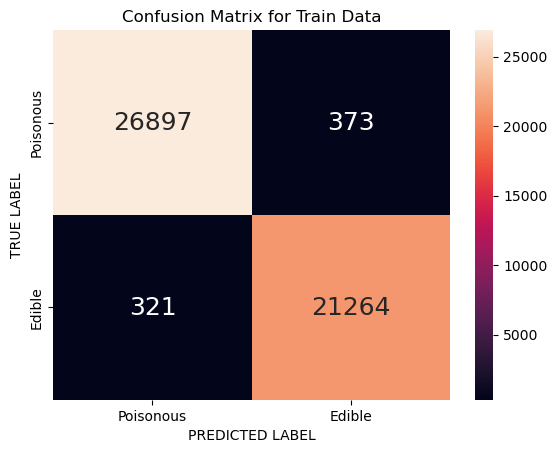

True Positive Rate :  0.9851285615010424
False Positive Rate :  0.013678034470113678
Accuracy:	 0.9857946985978917


In [62]:
# Print the confusion matrix of the test data set
x_axis_labels = ["Poisonous", "Edible"]
y_axis_labels = ["Poisonous", "Edible"]

# Print the accuracy score which is the percentage of the correct predictions on the train set
print("Accuracy :", accuracy_score(edible_train, edible_train_pred))

# Generate the classification report of the train set
print(classification_report(edible_train, edible_train_pred))

sb.heatmap(confusion_matrix(edible_train, edible_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Train Data')
plt.show()

# Compute the TPR and FPR using the function for Train set
[TPR, FPR] = binary_metrics(edible_train, edible_train_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)


### Test Set

Accuracy : 0.9852628131652202
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6618
           1       0.98      0.98      0.98      5596

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



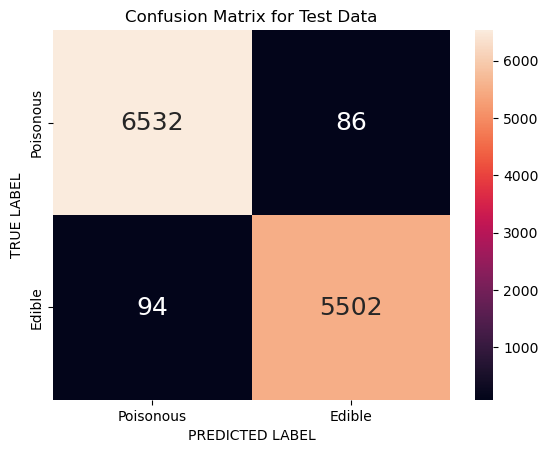

True Positive Rate :  0.9832022873481058
False Positive Rate :  0.012994862496222424


In [63]:
# Scaling the features in the test set
predictor_test_std = sc.fit_transform(predictor_test)

# Predict the class using the standardized predictor variables in the test set 
edible_test_pred = model.predict(predictor_test_std)

# Print the accuracy score which is the percentage of the correct predictions on the test set
print("Accuracy :", accuracy_score(edible_test, edible_test_pred))

# Generate the classification report of the test set
print(classification_report(edible_test, edible_test_pred))

# Print the confusion matrix of the test data set
sb.heatmap(confusion_matrix(edible_test, edible_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, edible_test_pred)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)



### Findings :

Based on the evaluations done on the Train and Test Datasets:

Predictions on the Train dataset had an accuracy of 0.98579 while 

Predictions on the Test data had an accuracy of 0.98526

We have also obtained a very high TPR with a very low FPR.

The Support Vector Machine with the Radial Basis Function (RBF) kernel has worked very well, and our theory that our previous models could not capture the complex non-linear relationships well is likely to be correct.

But now, we still want to try improve this SVM model further through SVM Hyperparameter Tuning using the GridSearchCV technique that we learned.


## SVM Hyperparameter Tuning using GridSearchCV

Hyperparameter tuning is the process of selecting the optimal values for the hyperparameters of a machine learning algorithm. Hyperparameters are the values that are not learned during the training of the model, but are set by the user prior to training.
These parameters exhibit their importance by improving the performance of the model such as its complexity or its learning rate.

Grid search is used in hyperparameter tuning in which a grid of possible hyperparameter values is specified, and the performance of the model is evaluated for each combination of hyperparameters on a validation set. The combination of hyperparameters that gives the best performance on the validation set is selected as the optimal set of hyperparameters for the model.

The 2 Hyperparameters we are tuning now are **C & Gamma**.
To recap, SVM is about finding the best Hyperplane(more than 3-D) in separating the classes, and it deals with the balance between C & Gamma.

- **C** is a hyperparameter to control error.
Low C means a stricter decision boundary that gives Low error.
Large C means a less strict decision boundary that allows for Larger error.

- **Gamma** is a hyperparameter that controls how much curvature we want in a decision boundary.
High Gamma means more curvature.
Low Gamma means less curvature.




Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time= 1.3min
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.984 total time= 1.3min
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=  47.6s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=  47.9s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.785 total time= 1.6min
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.785 total time= 1.6min
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.647 total time= 1.8min
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.635 total time= 1.8min
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.558 total time= 1.9min
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.558 total time= 1.9min
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time= 1.3min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;

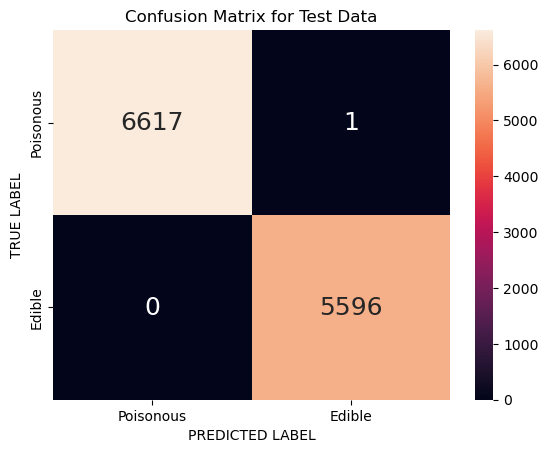

True Positive Rate :  1.0
False Positive Rate :  0.0001511030522816561


In [64]:
# Import the GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Create the GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)

# Fit the model using scaled train data (_std) for grid search
# Flatten the edible_train to a 1D array
grid.fit(predictor_train_std, edible_train.values.ravel())

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# Predict the class on the test set
grid_predictions = grid.predict(predictor_test_std)

# Print the accuracy score which is the percentage of the correct grid_predictions compared to the test set 
print("Accuracy :", accuracy_score(edible_test, grid_predictions))

# print classification report
print(classification_report(edible_test, grid_predictions))

# Print the confusion matrix of the test data set compared to grid_predictions
sb.heatmap(confusion_matrix(edible_test, grid_predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Test Data')
plt.show()

# Compute the TPR and FPR using the function for Test set
[TPR, FPR] = binary_metrics(edible_test, grid_predictions)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)


### Findings : 

After tuning the hyperparameters, we found the optimum of C=10, gamma=0.1 which gave an acurracy score of approximately 1.00, with TPR = 1.0 and FPR = 0.00015! We are very satisfied with the results.

# Conclusion

Through our Data Exploratory Analysis, we discovered that most features of a mushroom did not seem to have any clear correlation to the edibility of a mushroom. But when inputted into certain Machine Learning Models, the combination of these features can produce a fairly reliable prediction. 

Through Optimising our models, we have also discovered that features of a mushroom are likely to have non-linear relationships with each other. We then discovered that our Naïve Bayes Model and Logistic Regression Model did not work well when fed variables with non-linear relationships. 

Meanwhile, the Decision Tree and Support Vector Machine Model with RBF kernel worked exceptionally well when fed with non-linearly related variables. They had high accuracies in predicting edibility of a mushroom while having a very high TPR and a very low FPR. 

In conclusion, with the right models and sufficient combinations of features, it is indeed possible to predict if a mushroom is edible or not with a great amount of accuracy based off the mushroom's features.